## Project- Time Series Forecasting

### Sparkling Sales Analysis & Forecasting

#### For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [1]:
#Importing the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pylab import rcParams

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import month_plot, plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

#### 1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
# reading the data in the form of a time series
df = pd.read_csv('Sparkling.csv', parse_dates=True, index_col=0)

In [3]:
df.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [4]:
#Checking Shape of the data
df.shape

(187, 1)

In [5]:
#Checking the information of the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


- The DataFrame has 187 entries with a DatetimeIndex ranging from January 1980 to July 1995.- 
The 'Sparkling' column is of integer type (int64), and it has 187 non-null values.

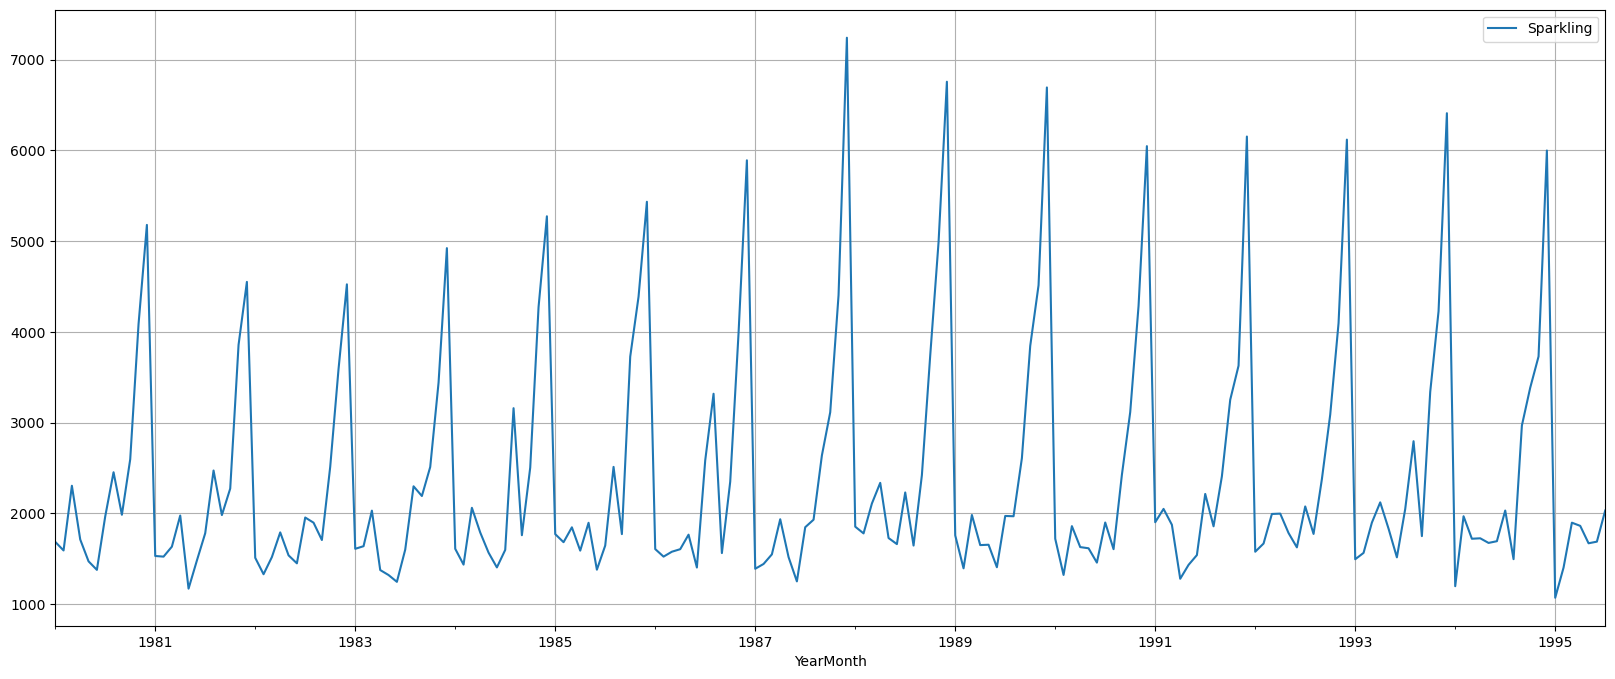

In [6]:
## Ploting the time series
rcParams['figure.figsize'] = 20,8
df.plot()
plt.grid();

- Increasing Trend: The sales of Sparkling products have been steadily increasing over the years of, indicating a positive trend in customersc demand.

- Seasonal Pattern: We observe that there are specific periods each year when sales go up, especially during November and December. These peaks might be due to the holiday season, when people tend to buy more Sparkling products for party etc.

- Historical data will enable accurate forecasting for better planning.

In [7]:
sparkling_data = df

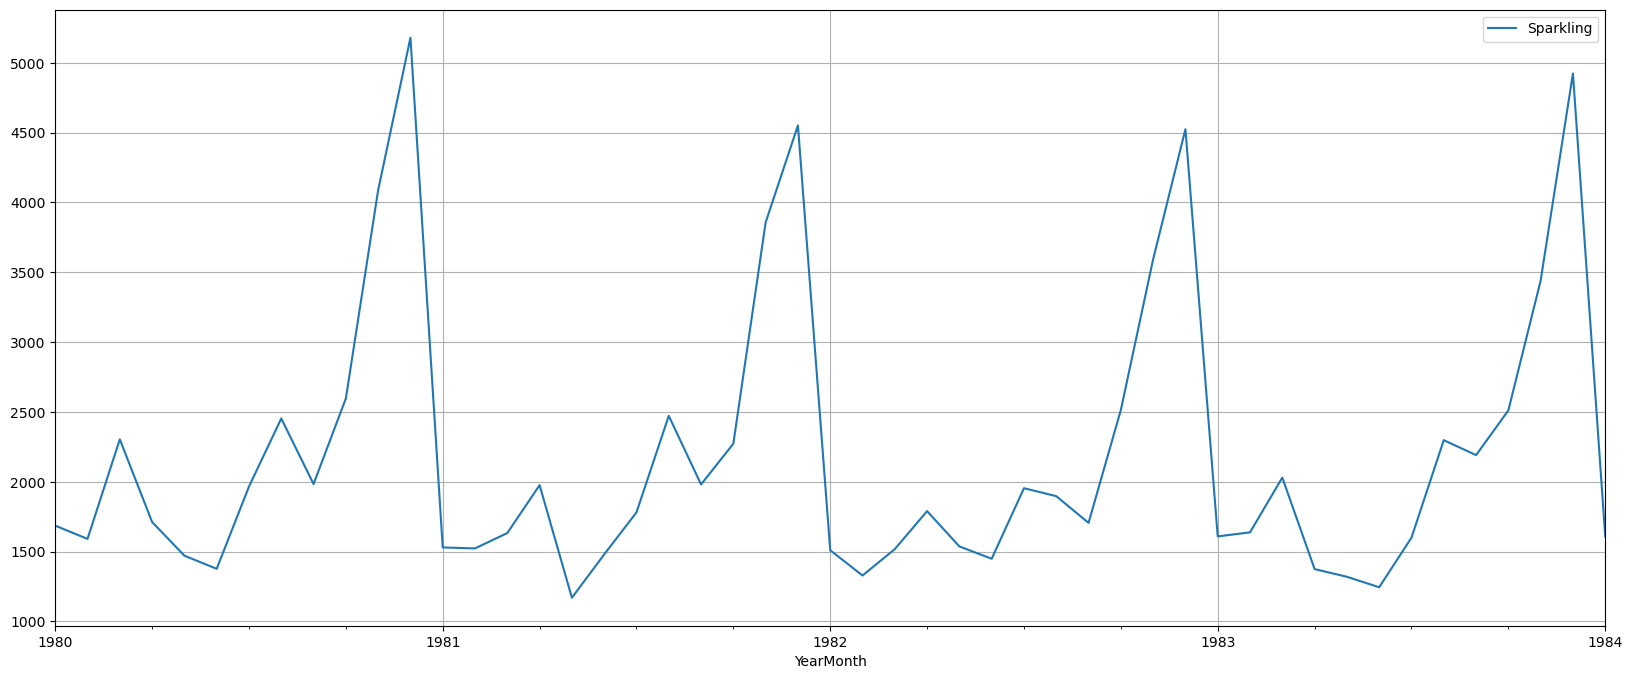

In [8]:
# plotting the first 4 year data to observe the seasonal aspects
sparkling_data[:49].plot(figsize=(20,8))
plt.grid()

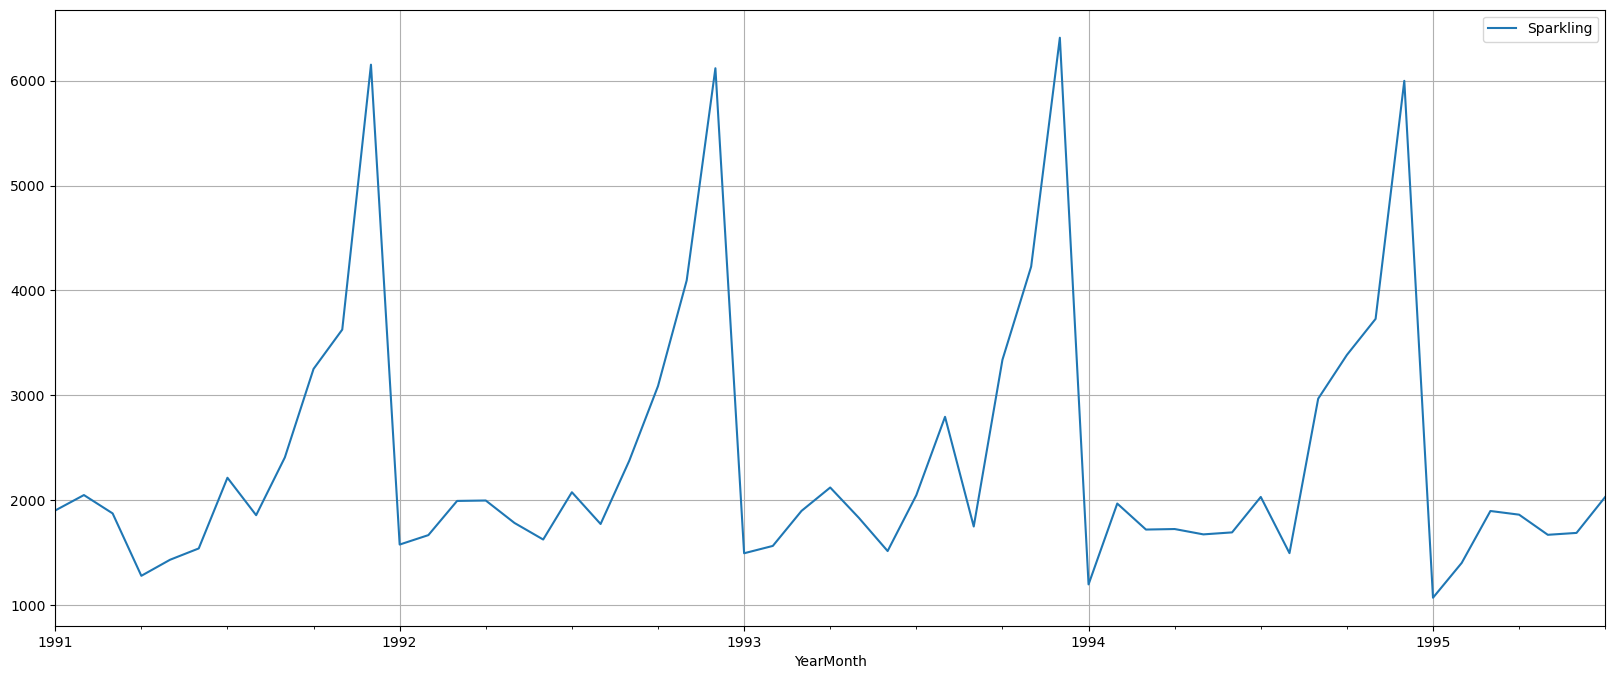

In [9]:
# plotting the last 4 year data to observe the seasonal aspects
sparkling_data[132:].plot(figsize=(20,8))
plt.grid()

#### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [10]:
#Checking Null Values
df.isnull().sum()

Sparkling    0
dtype: int64

In [11]:
#Duplicate values
df.duplicated().sum()

11

- There are no Null values in the dataset, which means the series is complete & ideal for analysis
- The dataset shows 11 Duplicates, however, this could be the same no of sales at different year, let's validate it.

In [12]:
duplicates = df[df.duplicated(keep=False)]
duplicates

Sparkling
YearMonth            
1981-02-01       1523
1982-03-01       1518
1982-08-01       1897
1983-01-01       1609
1984-01-01       1609
1985-01-01       1771
1985-07-01       1645
1985-09-01       1771
1986-02-01       1523
1986-03-01       1577
1986-04-01       1605
1987-05-01       1518
1988-08-01       1645
1989-08-01       1968
1990-01-01       1720
1990-08-01       1605
1992-01-01       1577
1994-02-01       1968
1994-03-01       1720
1994-07-01       2031
1995-03-01       1897
1995-07-01       2031

In [13]:
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

- Sparkling Wine Sales ranges from a minimum of 1070 to maximum of 7242.
- Mean of the Sparkling Wine Sales is around 2402.417112.
- Standard Deviation of the Sparkling Wine Sales is 1295.111540.
- 25% , 50% (median) and 75 % of Sparkling Wine Sales are 1605 , 1874 and 2549.

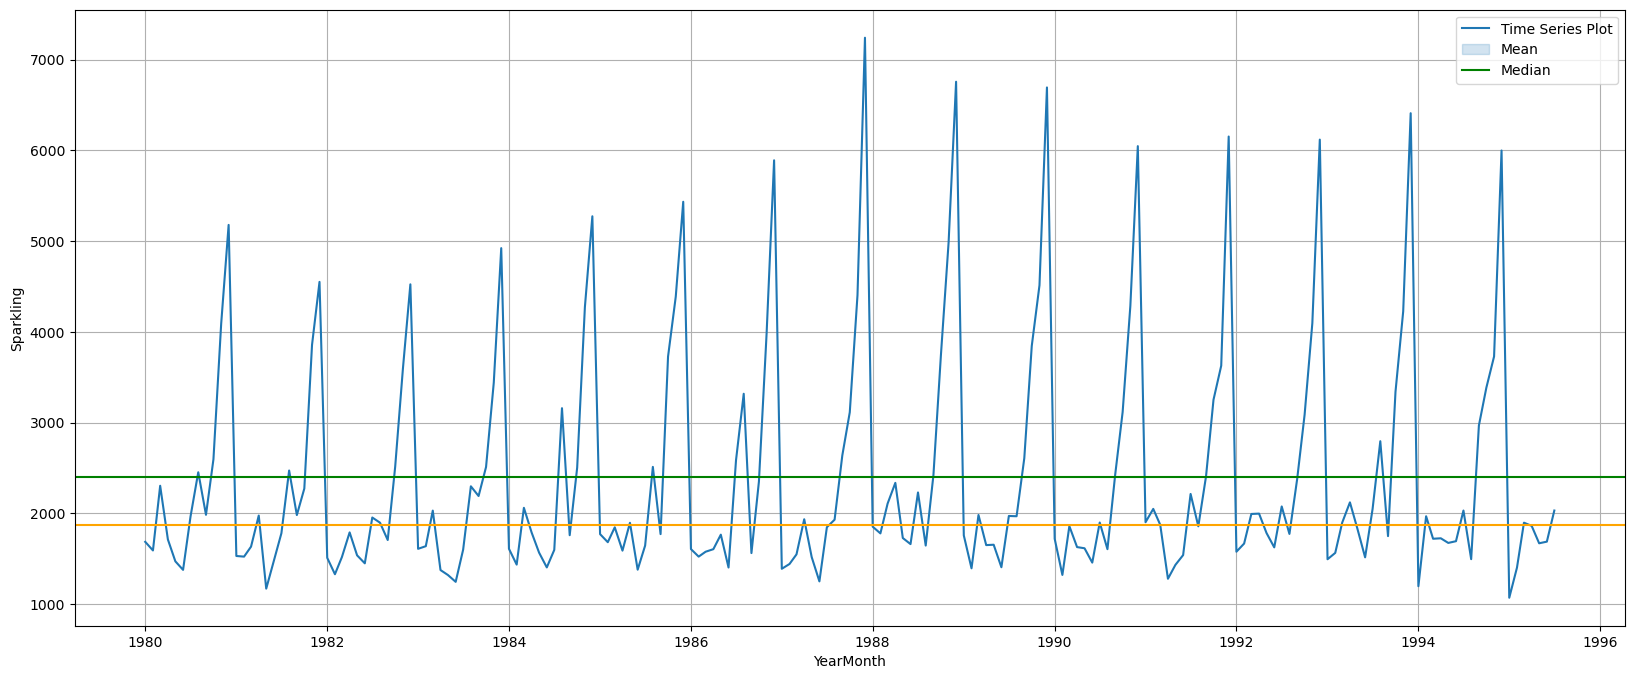

In [14]:
plt.figure(figsize=(20,8))
sns.lineplot(x= df.index, y = df['Sparkling'])
plt.axhline(df['Sparkling'].mean(),color='Green')
plt.axhline(df['Sparkling'].median(),color='Orange')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

Skewness = 1.82


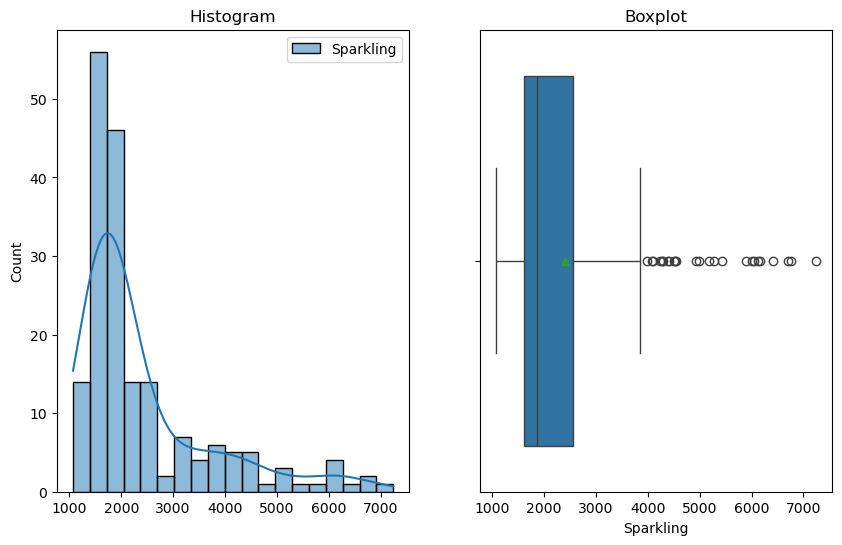

In [15]:
# Historgram & Boxplot of the sales
plt.figure(figsize = [10, 6])
plt.subplot(1,2,1)
plt.title('Histogram')
sns.histplot(df, kde = True);

plt.subplot(1,2,2)
plt.title('Boxplot')
sns.boxplot(x = df['Sparkling'], showmeans = True);
print('Skewness =', round(df['Sparkling'].skew(), 2));

In [16]:
df[df.index.year==1980]

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471
1980-06-01       1377
1980-07-01       1966
1980-08-01       2453
1980-09-01       1984
1980-10-01       2596
1980-11-01       4087
1980-12-01       5179

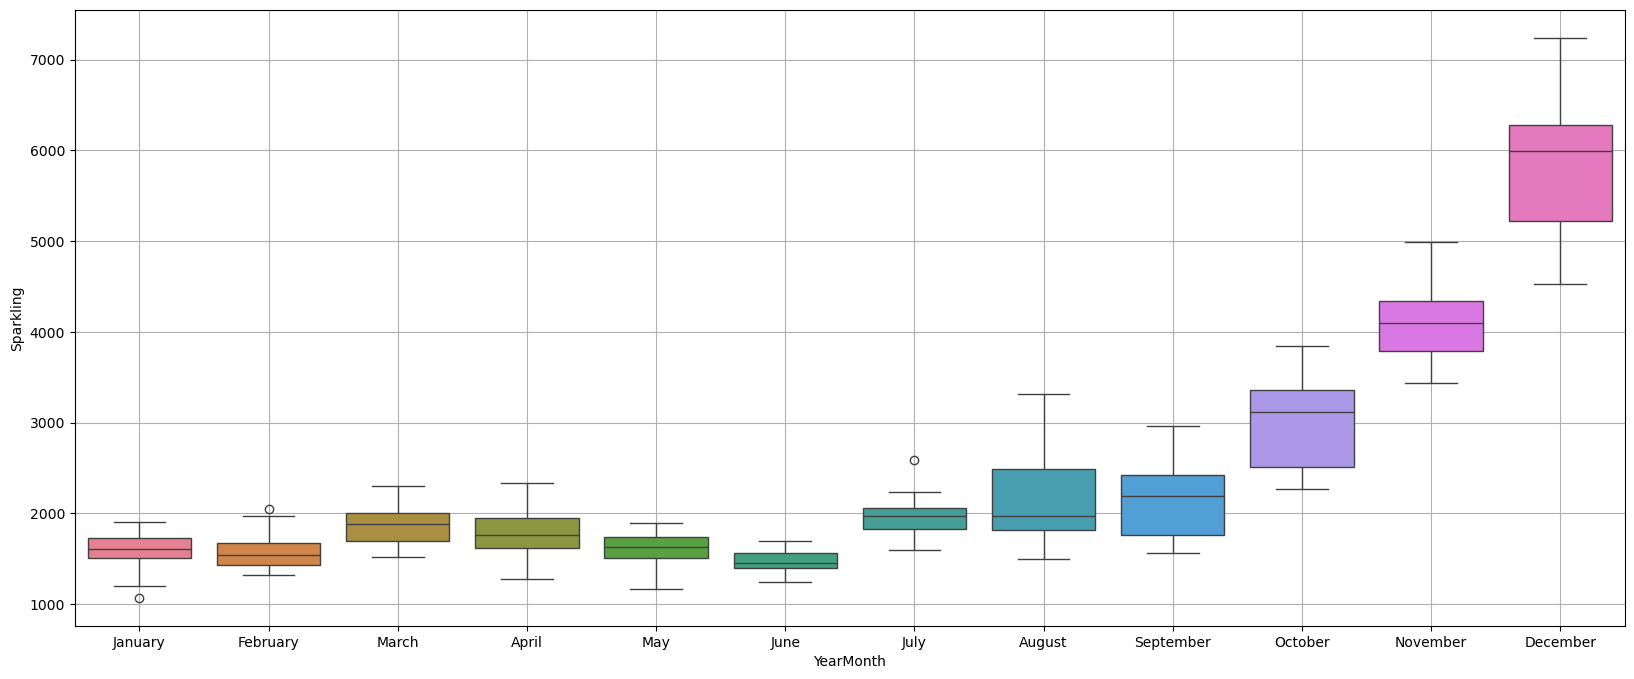

In [17]:
#Monthly boxplot
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'], palette = 'husl')
plt.grid();

In [18]:
df[df.index.month==1]

Sparkling
YearMonth            
1980-01-01       1686
1981-01-01       1530
1982-01-01       1510
1983-01-01       1609
1984-01-01       1609
1985-01-01       1771
1986-01-01       1606
1987-01-01       1389
1988-01-01       1853
1989-01-01       1757
1990-01-01       1720
1991-01-01       1902
1992-01-01       1577
1993-01-01       1494
1994-01-01       1197
1995-01-01       1070

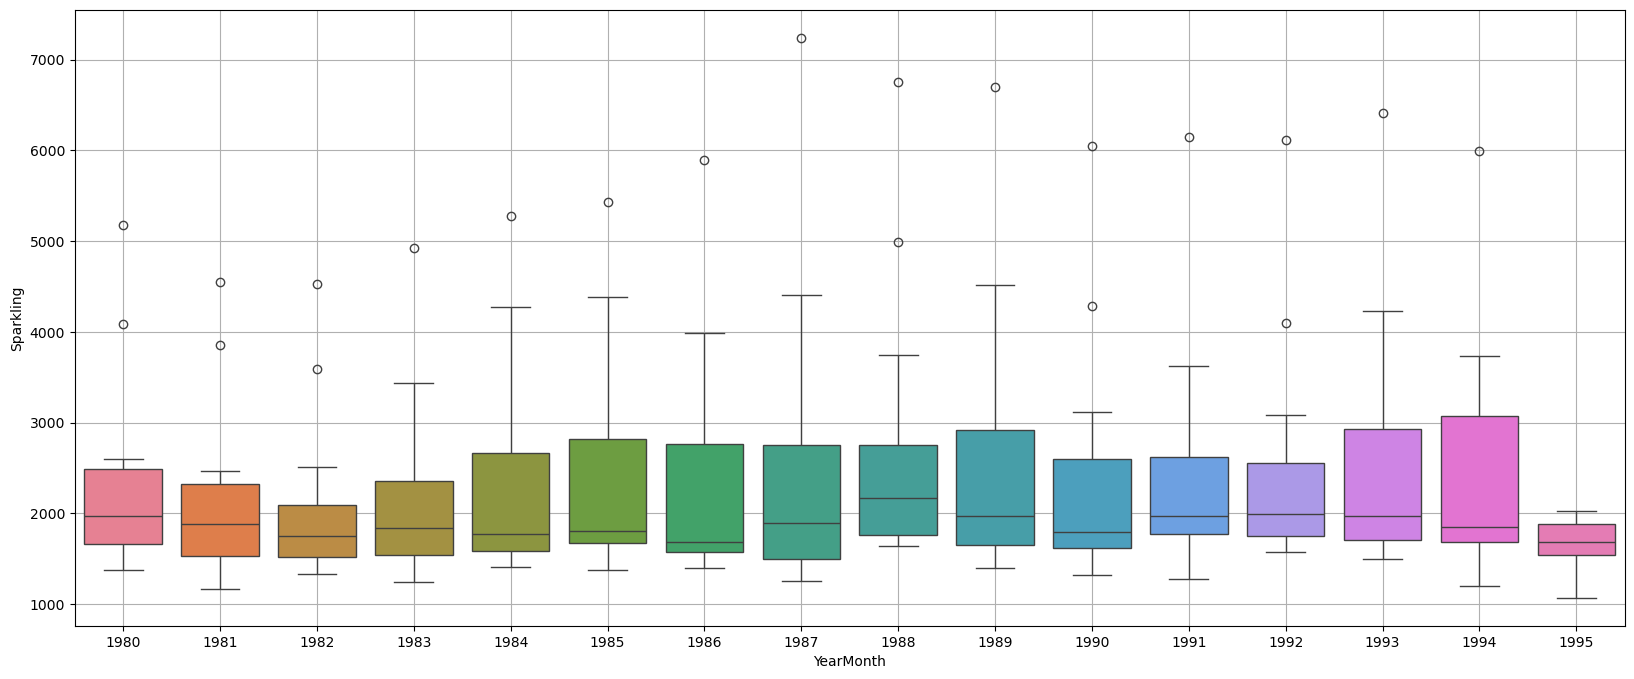

In [19]:
#Yearly Boxplot
sns.boxplot(x = df.index.year,y = df['Sparkling'], palette = 'husl')
plt.grid();

- Sales of Sparkling products have been increasing, with median sales rising over time.- 
The dataset is skewed with the presence of outliers on the right tail
- 
There is significant variability in sales from year to year, with a large interquartile rang
-  .
There are a few outliers in the data, which could be due to special promotions, holidays or other occasi.ons

###### Time series month Plot to understand the spread of sales across different years and within different months across years.

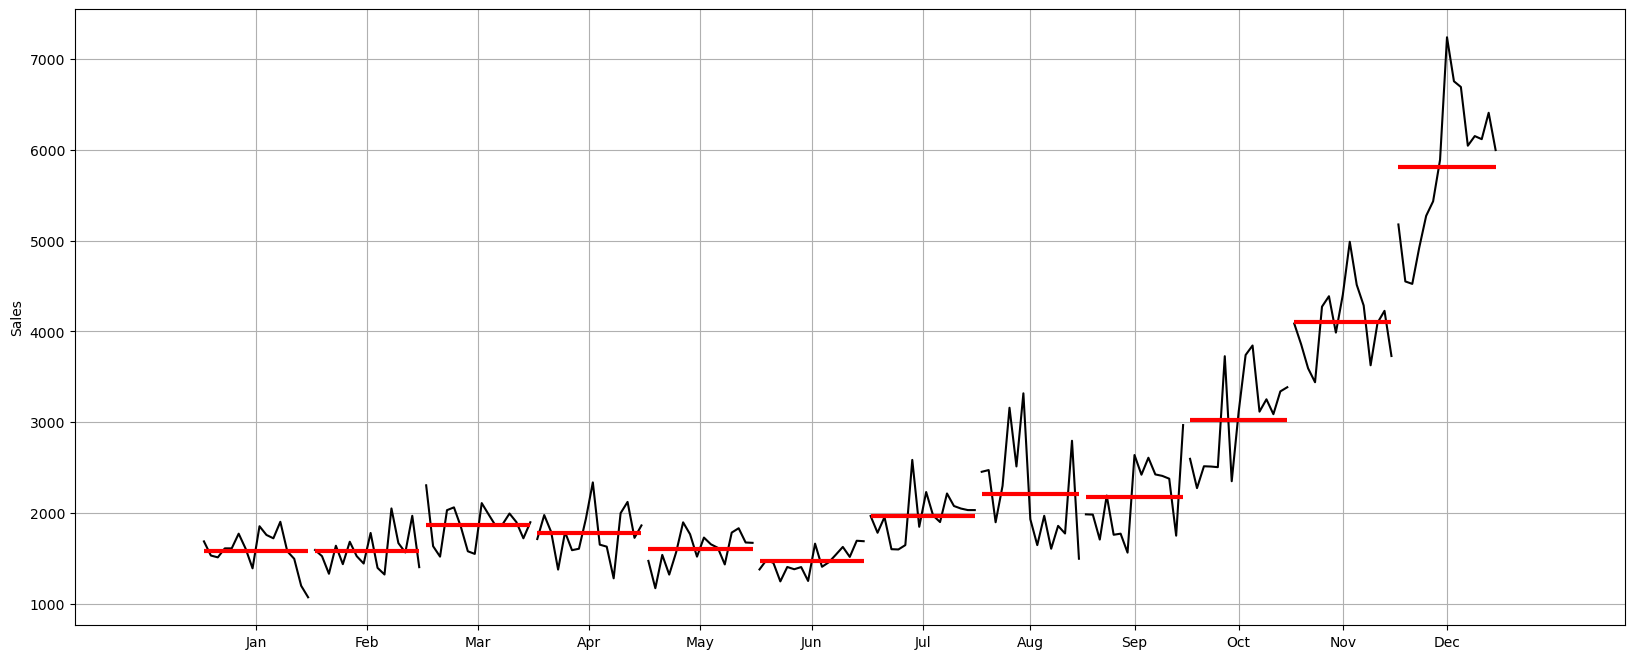

In [20]:
from statsmodels.graphics.tsaplots import month_plot
month_plot(df['Sparkling'],ylabel='Sales')
plt.grid();

- The Month Plot provides insights into the distribution of the Time Series data across different months, with the red line representing the median value.
- 
Upon analyzing the Month Plot, we can observe a constant (stable) trend that remains consistent across all the years for each month, except for December. Additionally, the plot shows clear seasonal patterns across the month.- 

In December, the sales initially dip, then experience an increase, followed by another drop, eventually stabilizing over the years. This pattern in December's sales aligns with the overall trend observed in the entire time sere- s.

The evidence suggests that December might be a significant month influencing the trend in the time series, given that it has the maximum sales compared to other months.onths.

In [21]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

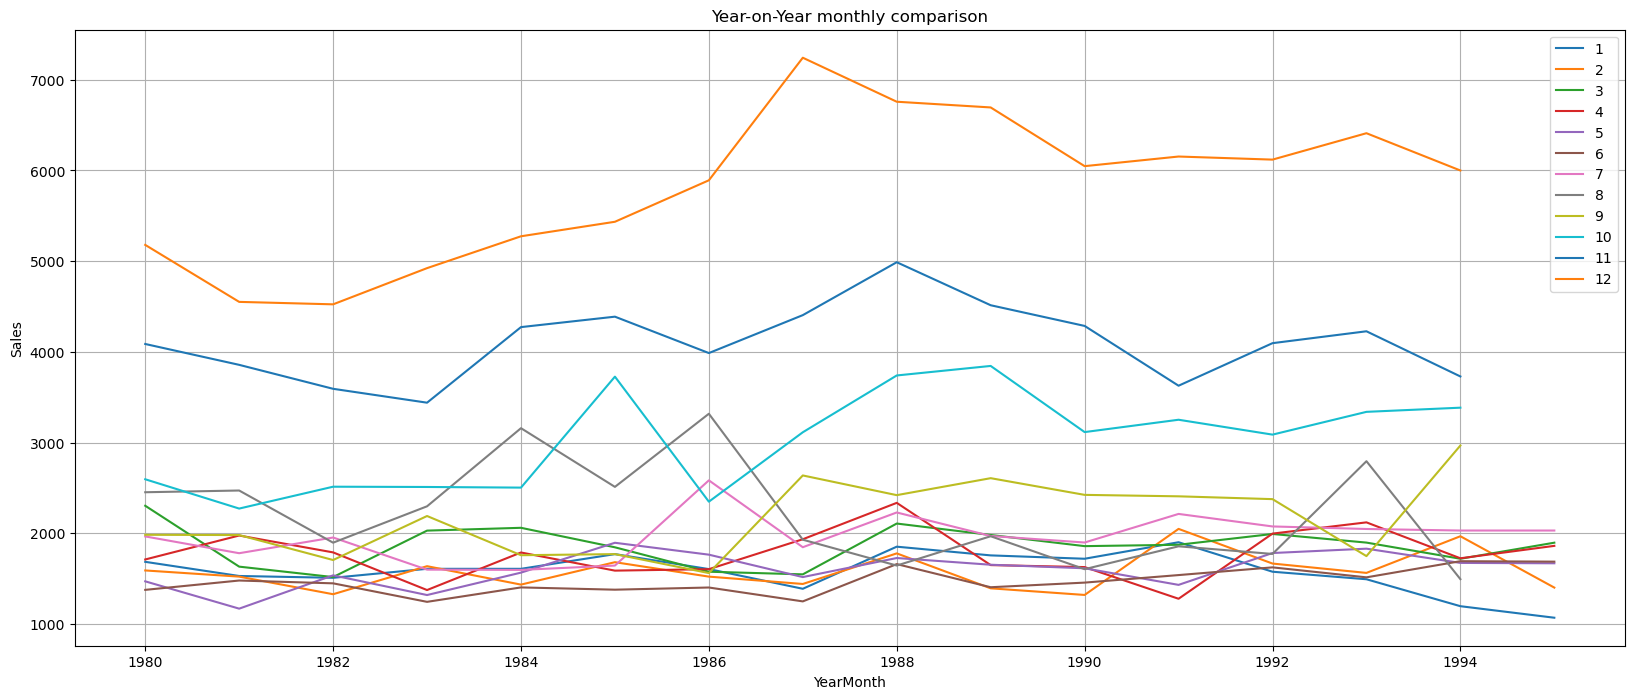

In [22]:
monthly_sales_across_years.plot(title = 'Year-on-Year monthly comparison', ylabel = 'Sales');
plt.grid()
plt.legend(loc='best');

- This shows us the behaviour of the Sparkling sales across various months.
- The sales are highest in December. The sale appears to drop in the month of January and is stable till July, with seasonal patterns across years.

- There is significant variability in sales from month to month

- There are a few outliers in the data, which could be due to special promotions, holidays or other occasions

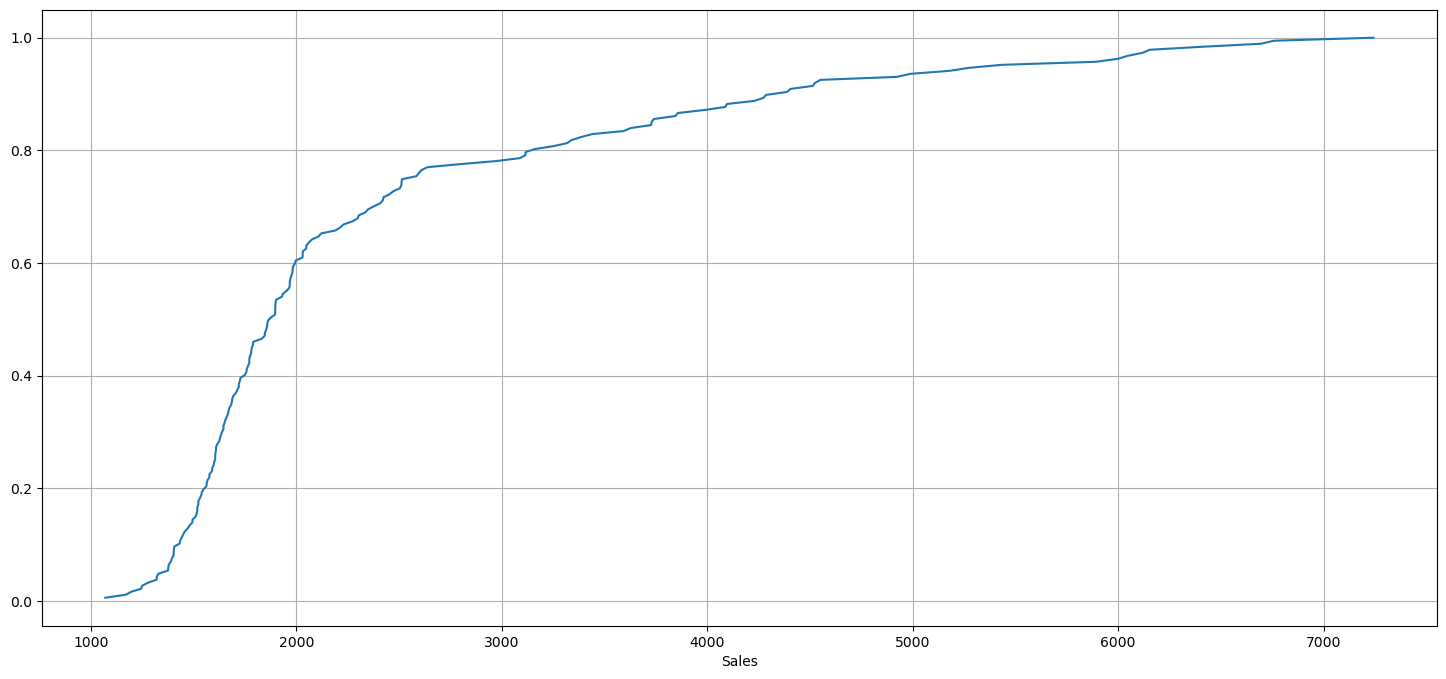

In [23]:
## Empirical Cumulative Distribution Plot
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

##### Plot the average Sparkling Sales per month and the month on month percentage change of Sparkling Sales.

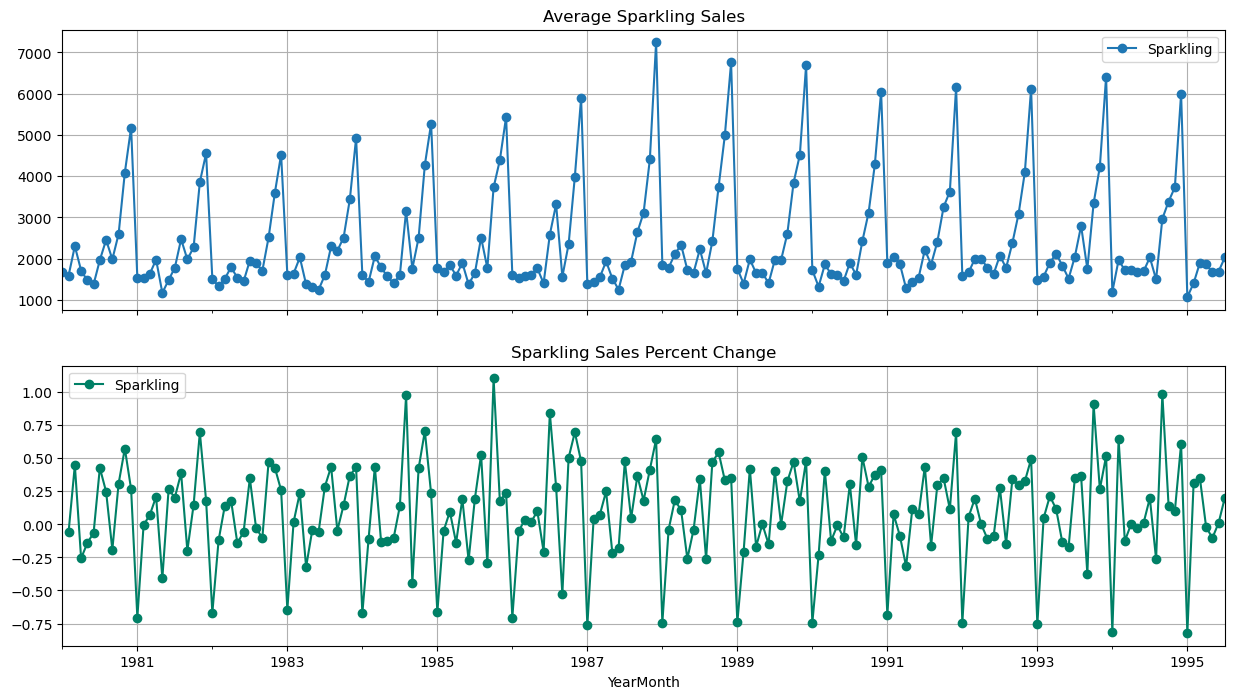

In [24]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Sales Percent Change",grid=True)

- The average sales are increasing year-on-year. This is evident from the fact that the line graph is generally increasing.
- The year-on-year percentage change in sales is positive for most years, but there are some years with negative changes increasing, but there are some periods where it decreases.
- There is a seasonal pattern in sales, with sales being highest in December.

In [25]:
## Decompose the Time Series and plot the different components.
from statsmodels.tsa.seasonal import seasonal_decompose

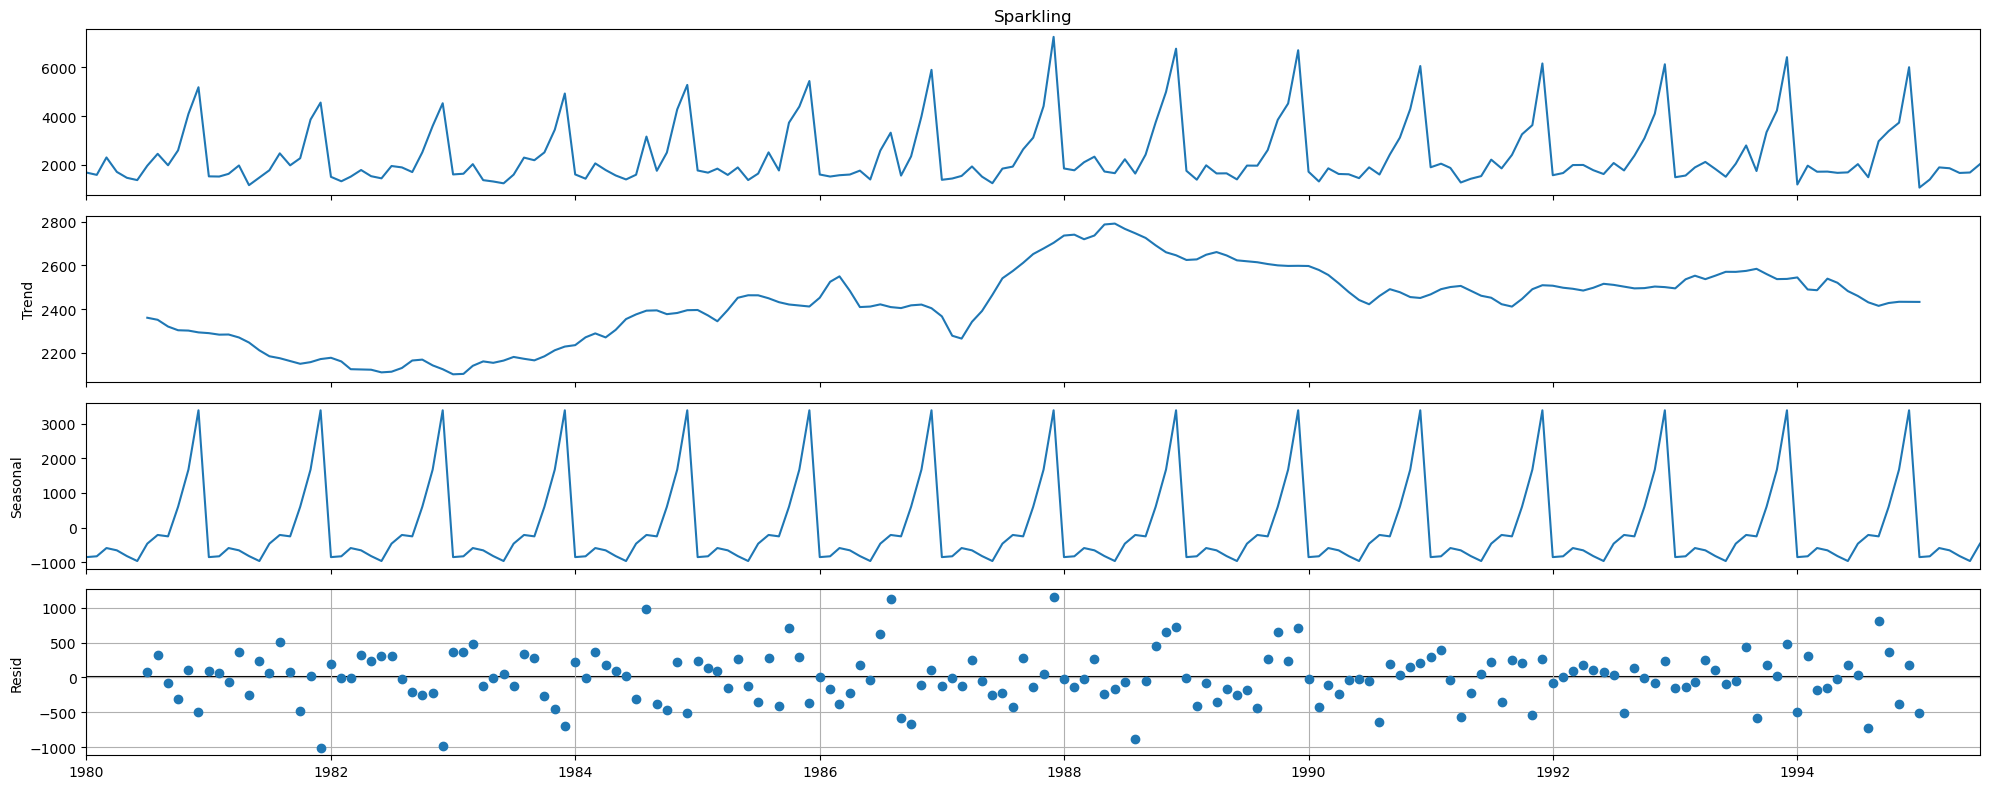

In [26]:
rcParams['figure.figsize'] = 20,8
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot()
plt.grid();

Skewness = 0.15


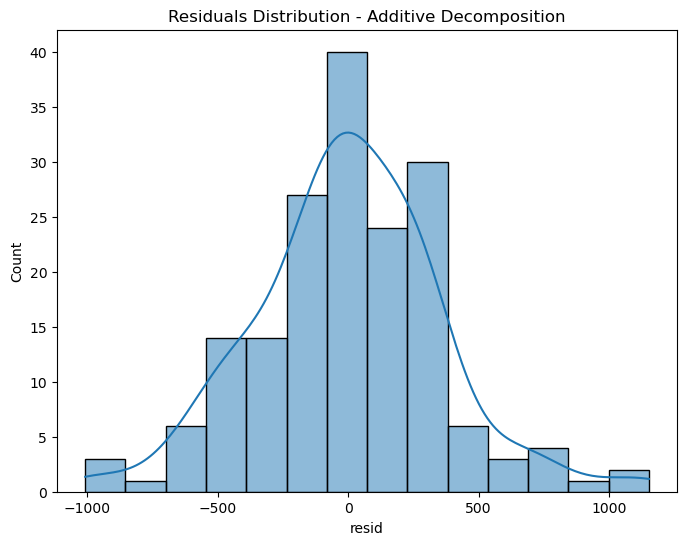

In [27]:
#Printing the values of decomposed time series
plt.figure(figsize = [8, 6])
plt.title('Residuals Distribution - Additive Decomposition')
sns.histplot(decomposition.resid, kde = True);
print('Skewness =', round(decomposition.resid.skew(), 2))

In [28]:
stats.shapiro(decomposition.resid.dropna())

ShapiroResult(statistic=0.9833053350448608, pvalue=0.0343334935605526)

p-value < 0.05

- We Reject the null hypothesis.
Hence Residuals are not normally distributed. The time series is not an additive time series.

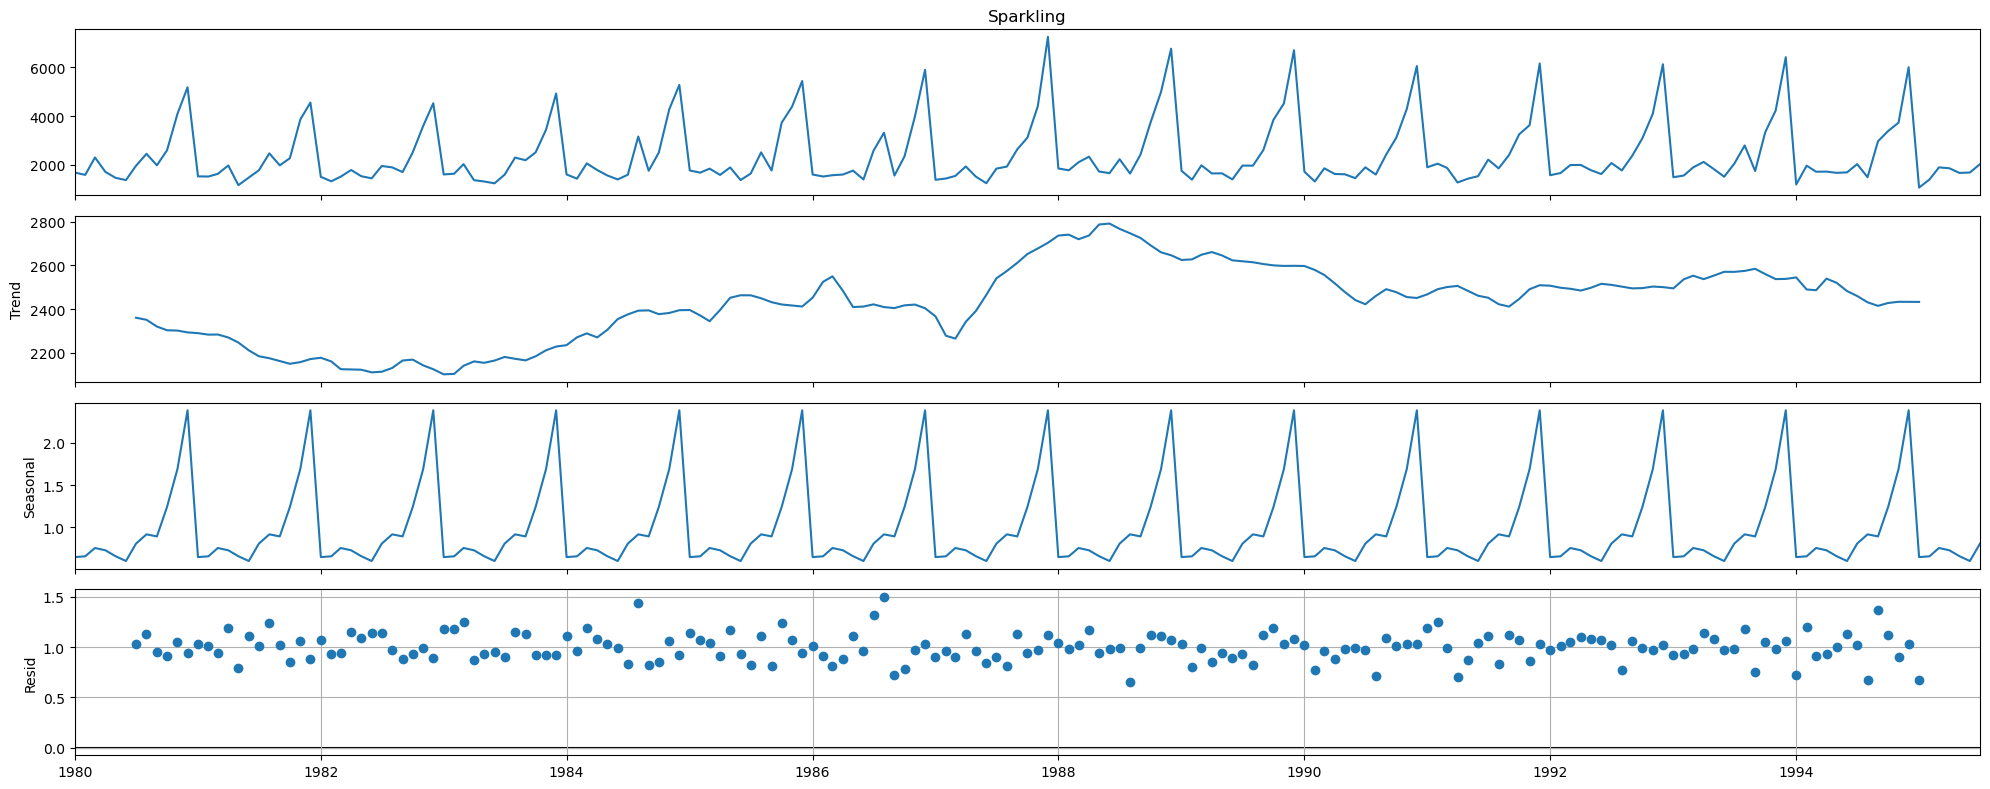

In [29]:
rcParams['figure.figsize'] = 20,8
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot()
plt.grid();

Skewness = 0.24


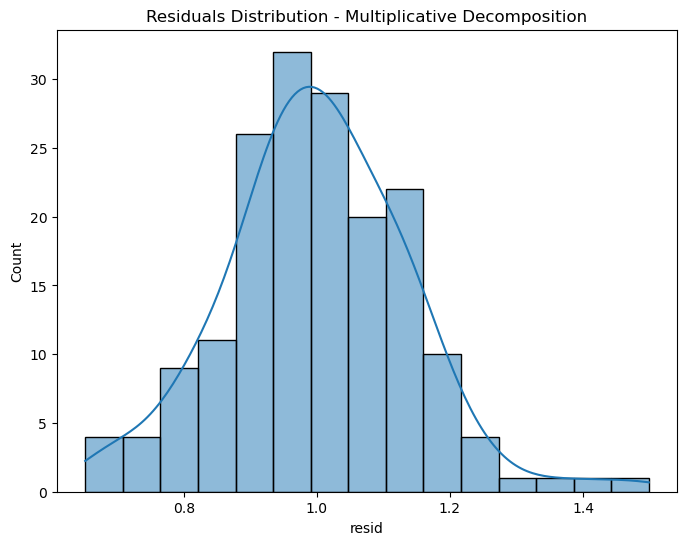

In [30]:
#Printing the values of decomposed time series
plt.figure(figsize = [8, 6])
plt.title('Residuals Distribution - Multiplicative Decomposition')
sns.histplot(decomposition.resid, kde = True);
print('Skewness =', round(decomposition.resid.skew(), 2))

In [31]:
## Test of Normality
## defining the Null & alternate hypothesis
## Ho: The residuals are normally distributed
## Ha: The residuals are not normally distributed
stats.shapiro(decomposition.resid.dropna())

ShapiroResult(statistic=0.9859988689422607, pvalue=0.07802142202854156)

p - value > 0.05

- here p-value, We fail to reject the Null hypothesis.
- Residuals are normally distributed. The time series is a multiplicative time series.

In [32]:
#Printing the values of decomposed time series
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

#### 3. Split the data into training and test. The test data should start in 1991.

In [145]:
#Train - Test Split
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [34]:
## Display multiple data frames from one cell
from IPython.display import display

print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [35]:
#Printing the dimentions of the data after split
print('Dimentions of Original Dataset:' ,df.shape)
print('Dimentions of Training data:', train.shape)
print('Dimentions of Training data:', test.shape)

Dimentions of Original Dataset: (187, 1)
Dimentions of Training data: (132, 1)
Dimentions of Training data: (55, 1)


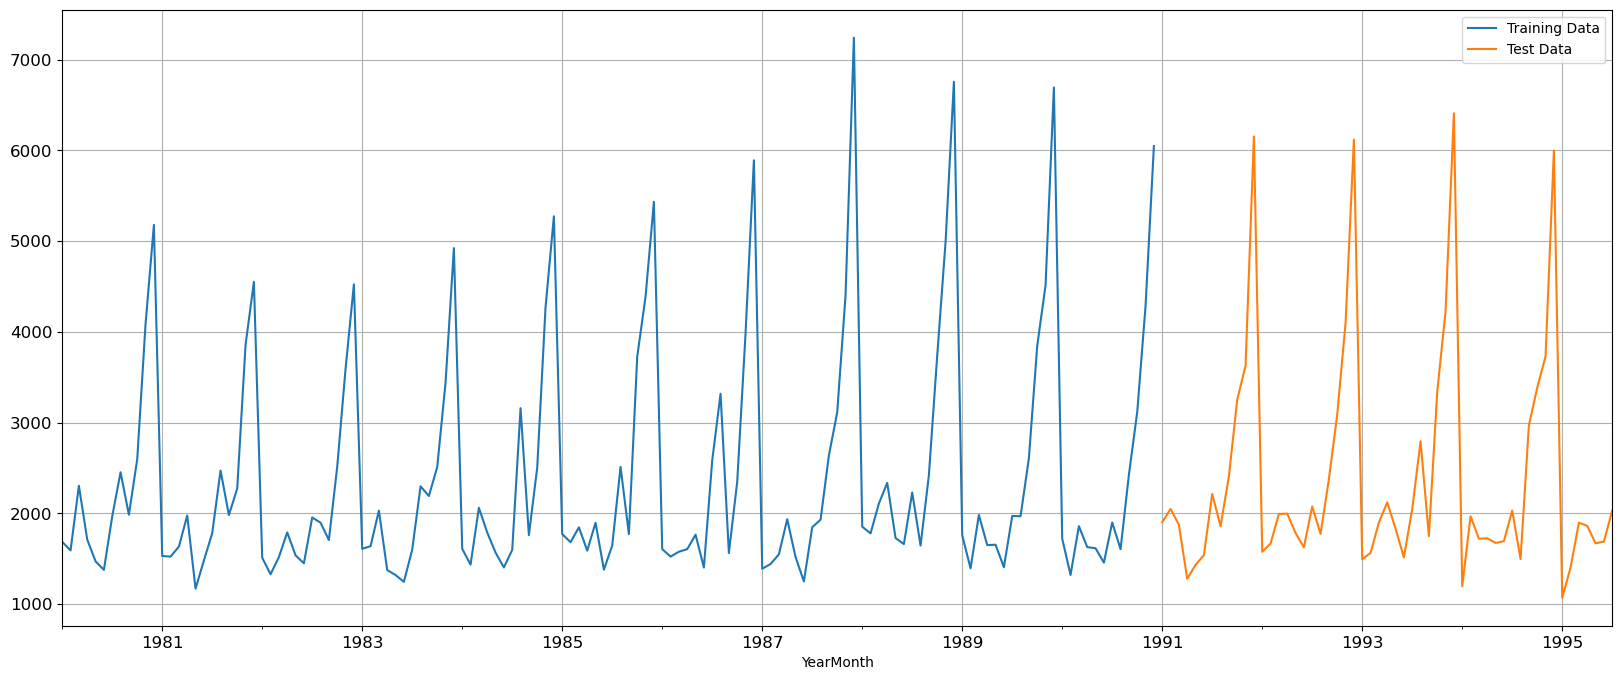

In [36]:
#Plotting the Train Test Split
train['Sparkling'].plot(fontsize=12)
test['Sparkling'].plot(fontsize=12)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

#### 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

##### Building different models and comparing the accuracy metrics.

##### 1.Linear Regression

In [37]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


- We have successfully generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test sekksct.

In [38]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [39]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

Last few rows of Training Data


Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132

First few rows of Test Data


Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137

Last few rows of Test Data


Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187

- Our training and test data has been modified. let's use LinearRegression to build the model on the training data and test the model on the test data.

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [41]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

In [42]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

In [43]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

In [44]:
LinearRegression_train.head()

Sparkling  time    RegOnTime
YearMonth                               
1980-01-01       1686     1  2021.741171
1980-02-01       1591     2  2027.573830
1980-03-01       2304     3  2033.406488
1980-04-01       1712     4  2039.239147
1980-05-01       1471     5  2045.071805

In [45]:
LinearRegression_test.head()

Sparkling  time    RegOnTime
YearMonth                               
1991-01-01       1902   133  2791.652093
1991-02-01       2049   134  2797.484752
1991-03-01       1874   135  2803.317410
1991-04-01       1279   136  2809.150069
1991-05-01       1432   137  2814.982727

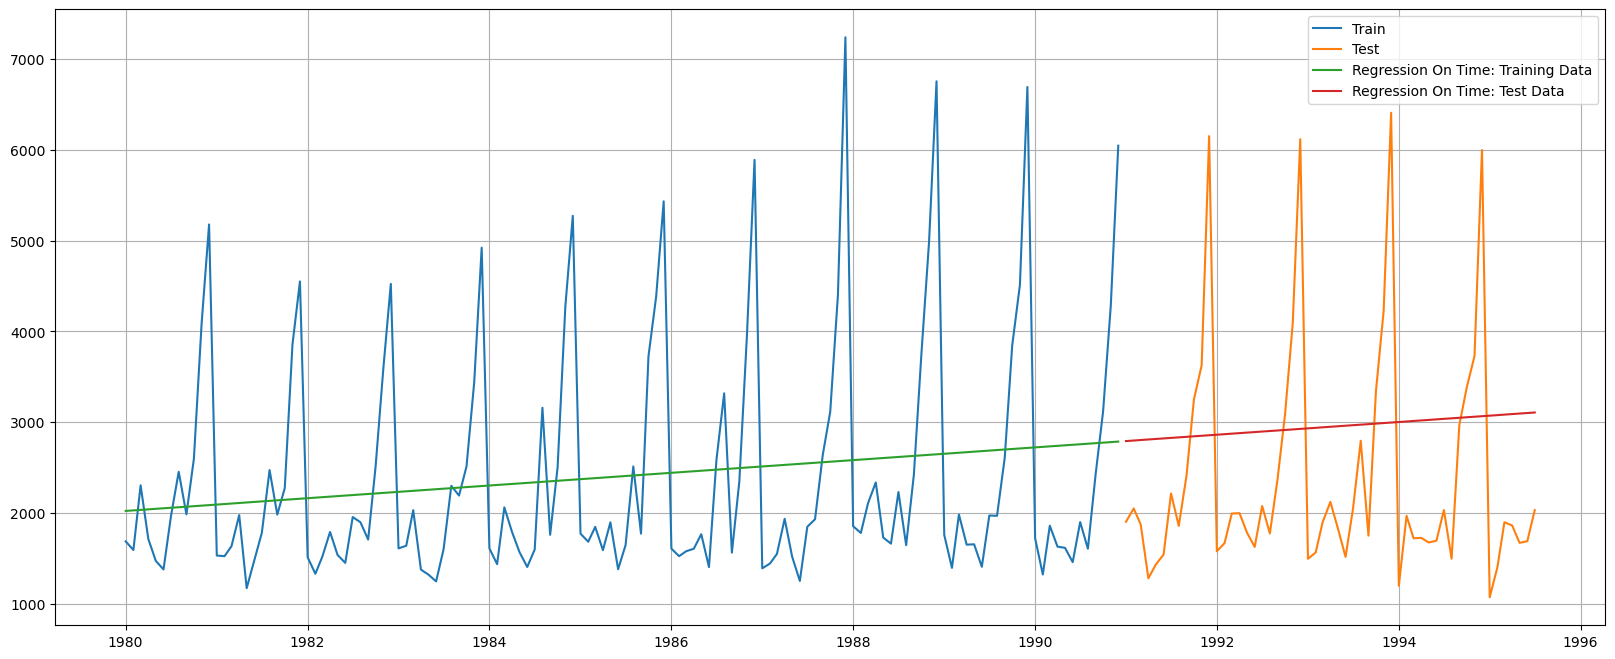

In [46]:
plt.figure(figsize=(20,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time: Training Data')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time: Test Data')
plt.legend(loc='best')
plt.grid()

In [47]:
from sklearn import metrics

In [48]:
## Mean Absolute Percentage - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [49]:
## Training Data - RMSE and MAPE

rmse_model1_train = metrics.mean_squared_error(train['Sparkling'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Sparkling'],train_predictions_model1)
print("For RegressionOnTime forecast on the Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))

For RegressionOnTime forecast on the Training Data:  RMSE is 1279.322 and MAPE is 40.05


In [50]:
## Test Data - RMSE and MAPE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Sparkling'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data:  RMSE is 1389.135 and MAPE is 50.15


In [51]:
## tabulating the results, for future comparison and assessment
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15

- Linear regression captures the trend but not the seasonality.
- RMSE is 1389.14, MAPE is 59.15 for Linear Regression, indicating difficulty in handling seasonality.

##### Naive Approach:

In [52]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [53]:
print("\n Last 5 values of Train data:\n", train.head())
print("\n Last 5 values of Train data:\n", train.tail())
print("\n Last 5 values of Test data:\n",test.head())
print("\n Last 5 values of Test data:\n",test.tail())


 Last 5 values of Train data:
             Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

 Last 5 values of Train data:
             Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

 Last 5 values of Test data:
             Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

 Last 5 values of Test data:
             Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031


In [54]:
NaiveModel_train['naive'] = train['Sparkling'].iloc[-1]
NaiveModel_train['naive'].head()

YearMonth
1980-01-01    6047
1980-02-01    6047
1980-03-01    6047
1980-04-01    6047
1980-05-01    6047
Name: naive, dtype: int64

In [55]:
NaiveModel_test['naive'] = train['Sparkling'].iloc[-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

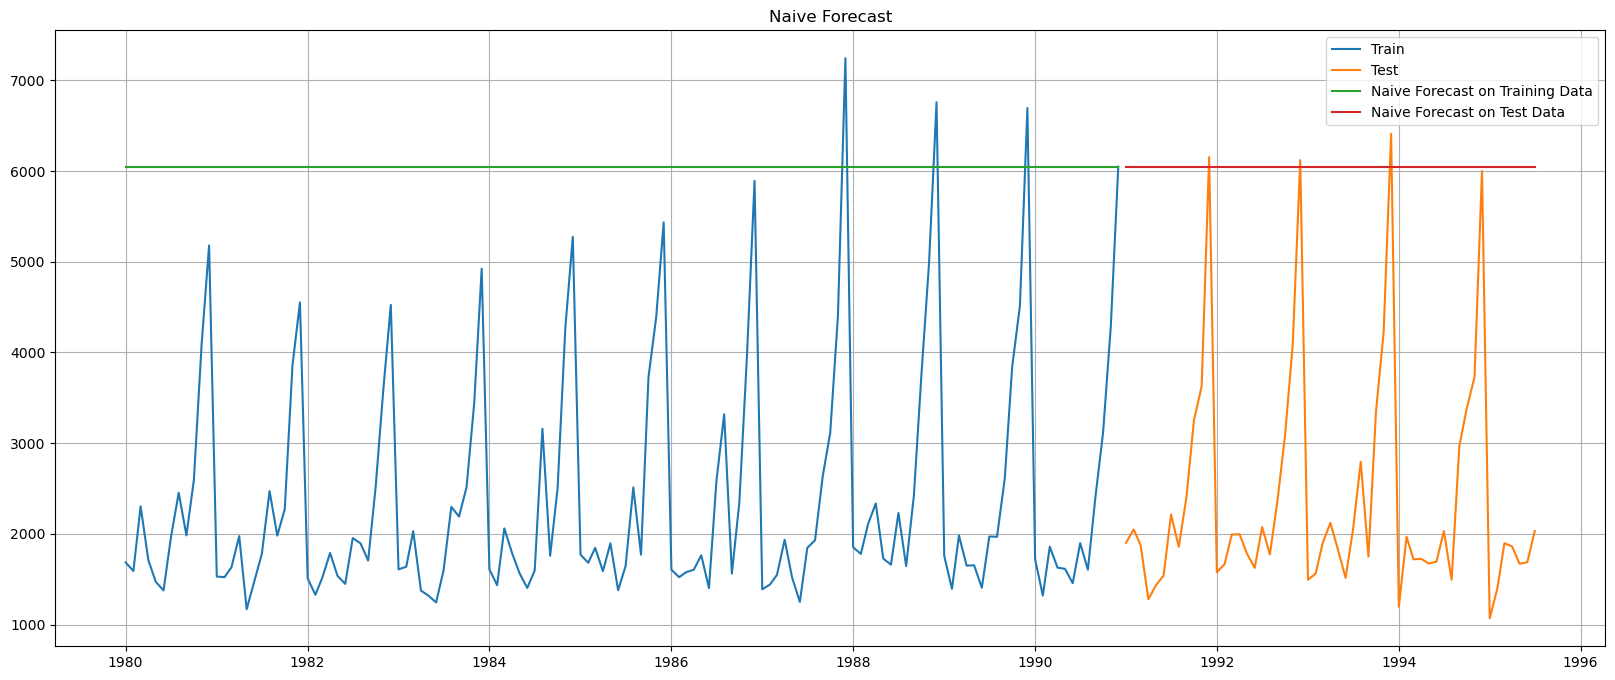

In [56]:
plt.figure(figsize=(20,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(NaiveModel_test['Sparkling'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid()

In [57]:
## model evaluation
## Training Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(NaiveModel_train['Sparkling'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(NaiveModel_train['Sparkling'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model2_train, mape_model2_train))

For Naive Model forecast on the Training Data:  RMSE is 3867.701 and MAPE is 153.17


In [58]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(NaiveModel_test['Sparkling'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(NaiveModel_test['Sparkling'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For RegressionOnTime forecast on the Test Data:  RMSE is 3864.279 and MAPE is 152.87


In [59]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  1389.135175      50.15
NaiveModel        3864.279352     152.87

- Naive approach ignores trend and seasonality as it forecasts the last observed value.
- RMSE is 3864.28, MAPE is 152.87 for Naive forecast, showing significant errors due to the lack of trend and seasonality capture.

##### Simple Average

In [60]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [61]:
SimpleAverage_train['Sparkling'].mean()

2403.780303030303

In [62]:
SimpleAverage_train['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_train.head()

Sparkling  mean_forecast
YearMonth                           
1980-01-01       1686    2403.780303
1980-02-01       1591    2403.780303
1980-03-01       2304    2403.780303
1980-04-01       1712    2403.780303
1980-05-01       1471    2403.780303

In [63]:
SimpleAverage_test['mean_forecast'] = test['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2399.145455
1991-02-01       2049    2399.145455
1991-03-01       1874    2399.145455
1991-04-01       1279    2399.145455
1991-05-01       1432    2399.145455

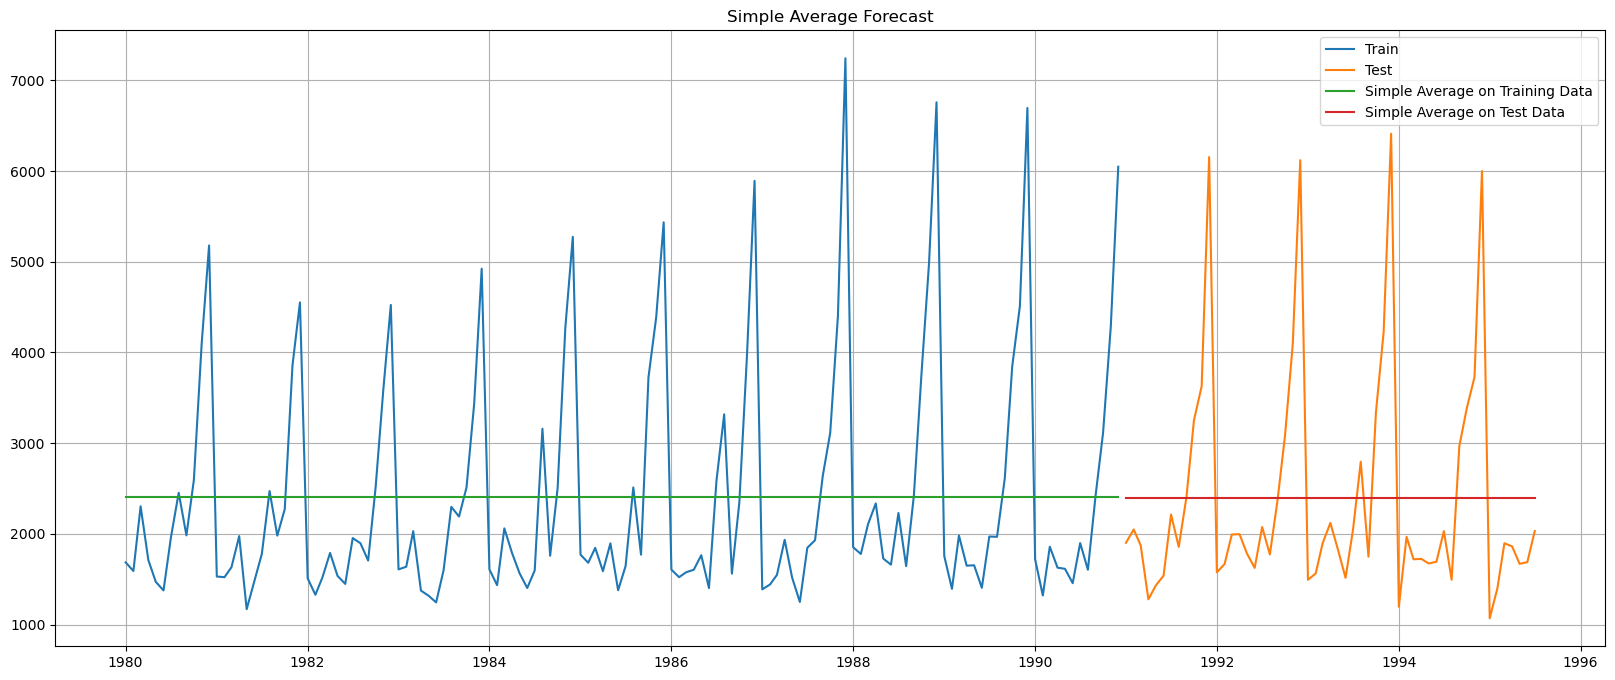

In [64]:
plt.figure(figsize=(20,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid()

In [65]:
## Training Data - RMSE and MAPE

rmse_model3_train = metrics.mean_squared_error(SimpleAverage_train['Sparkling'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(SimpleAverage_train['Sparkling'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model forecast on the Training Data:  RMSE is 1298.484 and MAPE is 40.36


In [66]:
## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(SimpleAverage_test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(SimpleAverage_test['Sparkling'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data: RMSE is %3.3f and MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data: RMSE is 1275.073 and MAPE is 38.81


In [67]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]} ,index=['SimpleAverageModel'])
resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime    1389.135175      50.15
NaiveModel          3864.279352     152.87
SimpleAverageModel  1275.073380      38.81

- Simple Average Model forecasts the mean of the training data. It ignores both the trend and seasonality.- 
RMSE is 1275.78, MAPE is 89816. Errors are significant due to the lack of trend and seasonality capture
- 
Performs better than linear regression in this case as test data has a constant trend different from the training data's underlying trend.

##### Moving Average(MA)

In [68]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [69]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

round(MovingAverage.head(10),2)

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN
1980-06-01       1377      1424.0     1716.00     1690.17         NaN
1980-07-01       1966      1671.5     1631.50     1736.83         NaN
1980-08-01       2453      2209.5     1816.75     1880.50         NaN
1980-09-01       1984      2218.5     1945.00     1827.17     1838.22
1980-10-01       2596      2290.0     2249.75     1974.50     1939.33

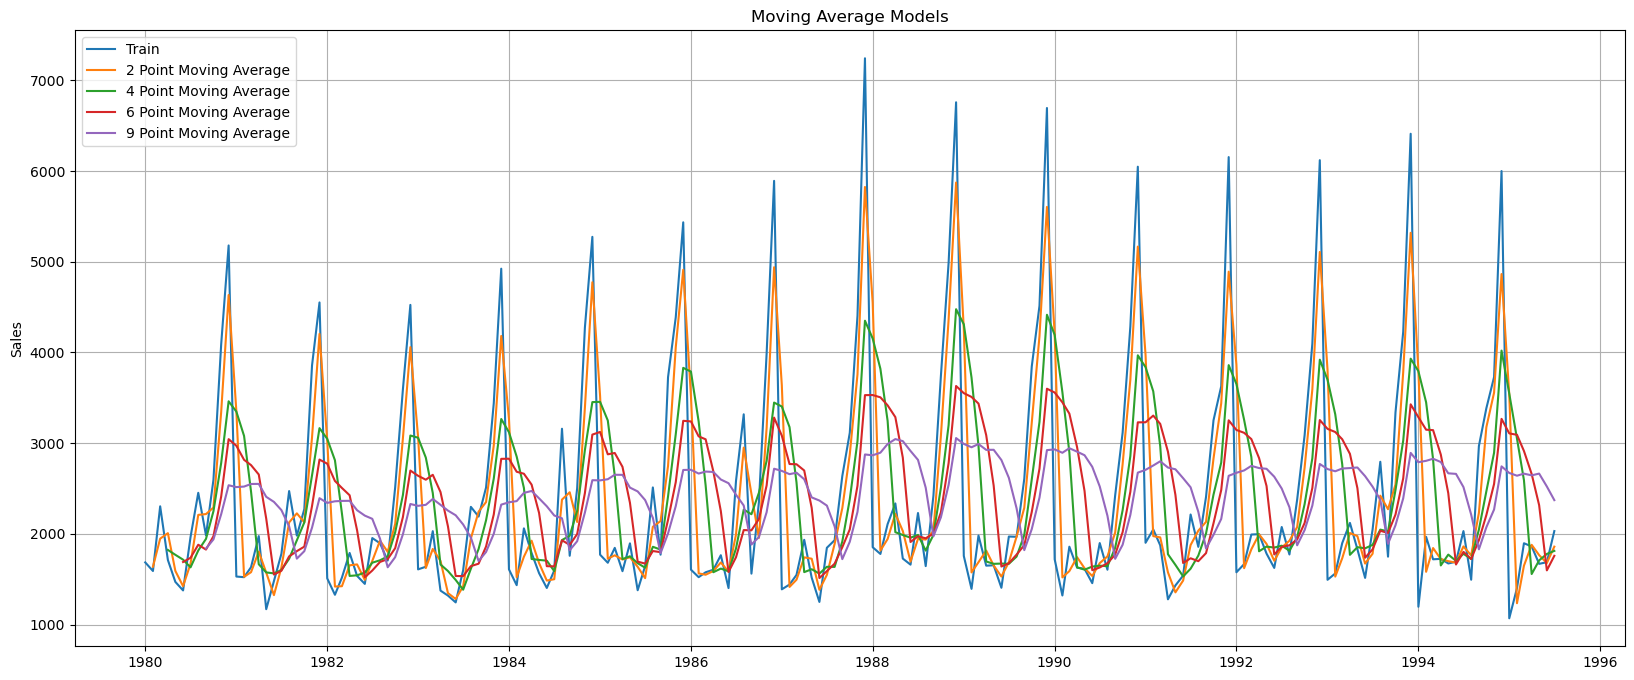

In [70]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.ylabel('Sales')
plt.title('Moving Average Models')
plt.grid();

In [71]:
#Creating train and test set
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year >= 1991]

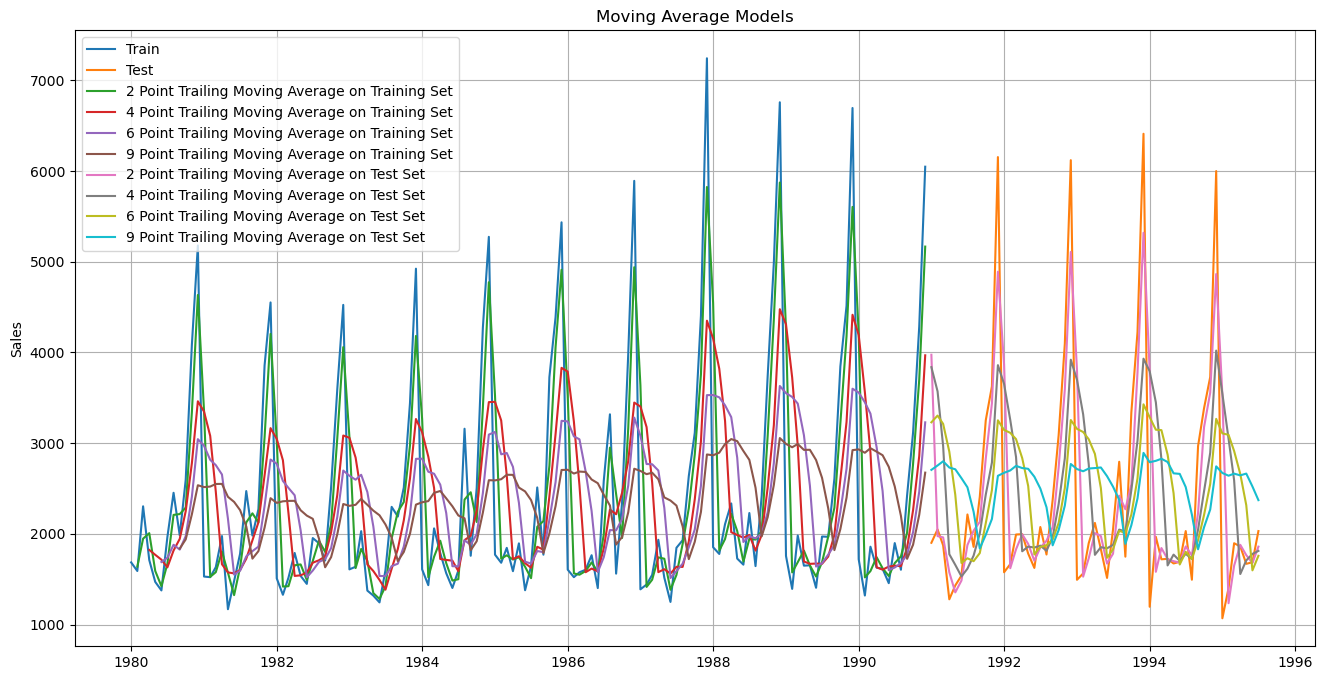

In [72]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label ='6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label ='9 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.ylabel('Sales')
plt.title('Moving Average Models')
plt.grid();

In [73]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(trailing_MovingAverage_test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(trailing_MovingAverage_test['Sparkling'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))

## Test Data - RMSE and MAPE --> 3 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(trailing_MovingAverage_test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(trailing_MovingAverage_test['Sparkling'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(trailing_MovingAverage_test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(trailing_MovingAverage_test['Sparkling'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(trailing_MovingAverage_test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(trailing_MovingAverage_test['Sparkling'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 813.401 and MAPE is 19.70
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 1156.590 and MAPE is 35.96
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 1283.927 and MAPE is 43.86
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 1346.278 and MAPE is 46.86


In [74]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime             1389.135175      50.15
NaiveModel                   3864.279352     152.87
SimpleAverageModel           1275.073380      38.81
2pointTrailingMovingAverage   813.400684      19.70
4pointTrailingMovingAverage  1156.589694      35.96
6pointTrailingMovingAverage  1283.927428      43.86
9pointTrailingMovingAverage  1346.278315      46.86

- The 2-point Trailing Moving Average model is selected as it has the least errors (RMSE & MAPE) among all the moving average models evaluated.

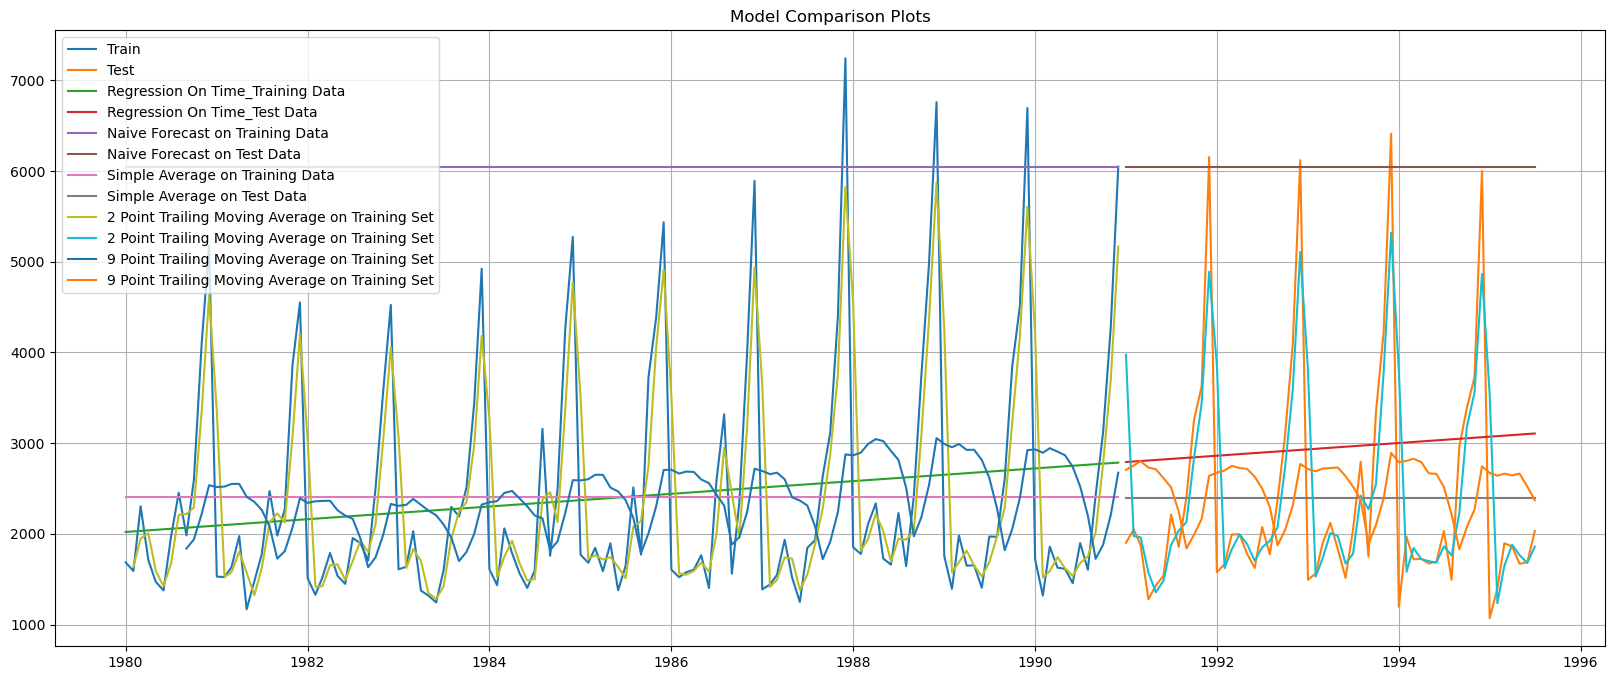

In [75]:
## Comparing the models so far
## Plotting on both Training and Test data
plt.figure(figsize=(20,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_train['Trailing_9'], label='9 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'], label='9 Point Trailing Moving Average on Training Set')


plt.legend(loc='upper left')
plt.title("Model Comparison Plots")
plt.grid()

- For the moving average models, here are the insights based on their RMSE and MAPE values:

- 2-Point Moving Average: RMSE = 813.4, MAPE = 19.70. It performs relatively well in capturing the trend and seasonality but still has room for improvement.

- 4-Point Moving Average: RMSE = 1156.59, MAPE = 35.96. It performs slightly worse than the 2-Point model, but it still shows better accuracy than simpler models like the Simple Average.

- 6-Point Moving Average: RMSE = 1283.82, MAPE = 43.86. It performs reasonably well but is not as accurate as the 2-Point or 4-Point models.

- 9-Point Moving Average: RMSE = 1346.28, MAPE = 46.86. It shows reasonable performance but is not as good as the 2-Point model.

- Overall, the 2-Point Moving Average model stands out as the best-performing model with the lowest RMSE and MAPE values. However, there is still room for improvement in all the models to better capture the trend and seasonality and reduce errors in the forecasts.

##### Exponential Smoothing methods

In [76]:
# importing the required libraries for exponential smoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [77]:
## Method 5: SINGLE EXPONENTIAL SMOOTHING
SES_train = train.copy()
SES_test = test.copy()

In [78]:
## SES - AUTO FIT
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [79]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [80]:
model_SES_autofit.params

{'smoothing_level': 0.03953488372093023,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [81]:
SES_train['predicted'] = model_SES_autofit.fittedvalues
SES_train.head()

Sparkling    predicted
YearMonth                         
1980-01-01       1686  1686.000000
1980-02-01       1591  1686.000000
1980-03-01       2304  1682.244186
1980-04-01       1712  1706.825230
1980-05-01       1471  1707.029814

In [82]:
SES_test['predicted'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

Sparkling    predicted
YearMonth                         
1991-01-01       1902  2676.676366
1991-02-01       2049  2676.676366
1991-03-01       1874  2676.676366
1991-04-01       1279  2676.676366
1991-05-01       1432  2676.676366

Text(0.5, 1.0, 'Alpha = 0 Predictions')

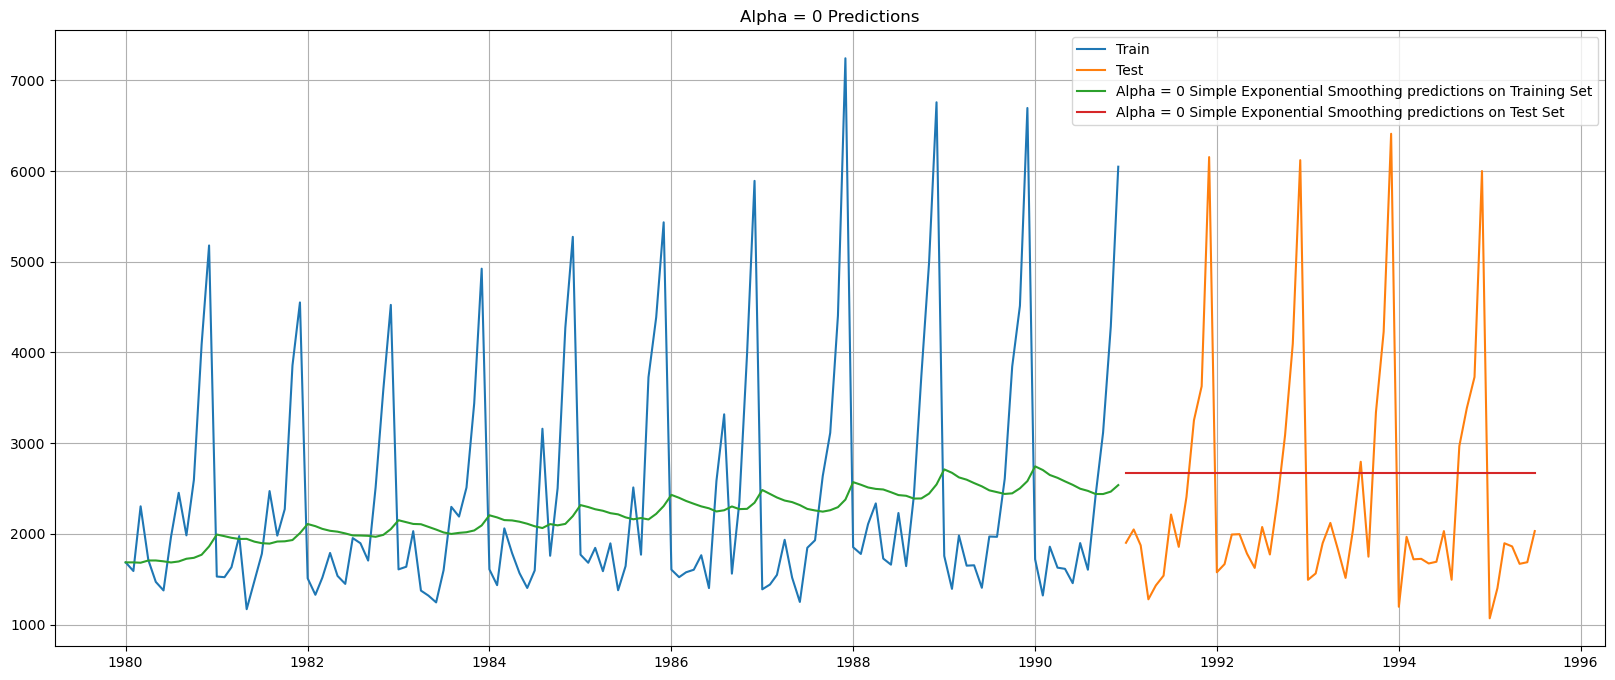

In [83]:
## Plotting on both the Training and Test data

plt.figure(figsize=(20,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_train['predicted'], label='Alpha = 0 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predicted'], label='Alpha = 0 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0 Predictions')

In [84]:
## Model Evaluation for alpha = 0 : Simple Exponential Smoothing
## Training Data
rmse_model5_ses_train_1 = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predicted'],squared=False)
mape_model5_ses_train_1 = MAPE(SES_train['Sparkling'],SES_train['predicted'])
print("For Alpha = 0 Simple Exponential Smoothing Model forecast on the Training Data, RMSE is %3.3f and MAPE is %3.2f" %(rmse_model5_ses_train_1, mape_model5_ses_train_1))

For Alpha = 0 Simple Exponential Smoothing Model forecast on the Training Data, RMSE is 1317.131 and MAPE is 39.05


In [85]:
## Test Data
rmse_model5_ses_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predicted'],squared=False)
mape_model5_ses_test_1 = MAPE(SES_test['Sparkling'],SES_test['predicted'])
print("For Alpha = 0 Simple Exponential Smoothing Model forecast on the Training Data, RMSE is %3.3f and MAPE is %3.2f" %(rmse_model5_ses_test_1, mape_model5_ses_test_1))

For Alpha = 0 Simple Exponential Smoothing Model forecast on the Training Data, RMSE is 1304.927 and MAPE is 44.48


In [86]:
resultsDf_5_1 = pd.DataFrame({'Test RMSE': [rmse_model5_ses_test_1],'Test MAPE': [mape_model5_ses_test_1]}
                           ,index=['Alpha=0,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                    1389.135175      50.15
NaiveModel                          3864.279352     152.87
SimpleAverageModel                  1275.073380      38.81
2pointTrailingMovingAverage          813.400684      19.70
4pointTrailingMovingAverage         1156.589694      35.96
6pointTrailingMovingAverage         1283.927428      43.86
9pointTrailingMovingAverage         1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing  1304.927405      44.48

- Simple exponential smoothing model provides one-step-ahead forecast. It ignores both the trend and seasonality in the data.- 
RMSE is 1338 and MAPE is 53.88, indicating poor performance in capturing underlying patterns
- 
The low smoothing parameter (0.07) implies a heavy reliance on past averages. This makes it less accurate compared to more sophisticated methods.

In [87]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_5_2 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_5_2

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [88]:
len(SES_test)

55

In [89]:
# Assuming resultsDf_5_2 is already defined
resultsDf_5_2 = pd.DataFrame()

for i in np.arange(0.1, 1.1, 0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i, optimized=True, use_brute=True)
    SES_train[f'predict_{i}'] = model_SES_alpha_i.fittedvalues
    SES_test[f'predict_{i}'] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model5_2_train_i = metrics.mean_squared_error(SES_train['Sparkling'], SES_train[f'predict_{i}'], squared=False)
    mape_model5_2_train_i = MAPE(SES_train['Sparkling'], SES_train[f'predict_{i}'])
    
    rmse_model5_2_test_i = metrics.mean_squared_error(SES_test['Sparkling'], SES_test[f'predict_{i}'], squared=False)
    mape_model5_2_test_i = MAPE(SES_test['Sparkling'], SES_test[f'predict_{i}'])
    
    new_row = {'Alpha Values': i, 'Train RMSE': rmse_model5_2_train_i, 
               'Train MAPE': mape_model5_2_train_i, 'Test RMSE': rmse_model5_2_test_i, 
               'Test MAPE': mape_model5_2_test_i}
    
    resultsDf_5_2 = pd.concat([resultsDf_5_2, pd.DataFrame([new_row])], ignore_index=True)

In [90]:
resultsDf_5_2

Alpha Values   Train RMSE  Train MAPE    Test RMSE  Test MAPE
0           0.1  1333.873836       42.03  1375.393398      49.53
1           0.2  1356.042987       43.79  1595.206839      60.46
2           0.3  1359.511747       43.73  1935.507132      75.66
3           0.4  1352.588879       42.75  2311.919615      91.55
4           0.5  1344.004369       41.16  2666.351413     106.27
5           0.6  1338.805381       39.80  2979.204388     118.77
6           0.7  1338.844308       38.55  3249.944092     129.34
7           0.8  1344.462091       37.60  3483.801006     138.34
8           0.9  1355.723518       36.79  3686.794285     146.08
9           1.0  1373.082528       35.83  3864.279352     152.87

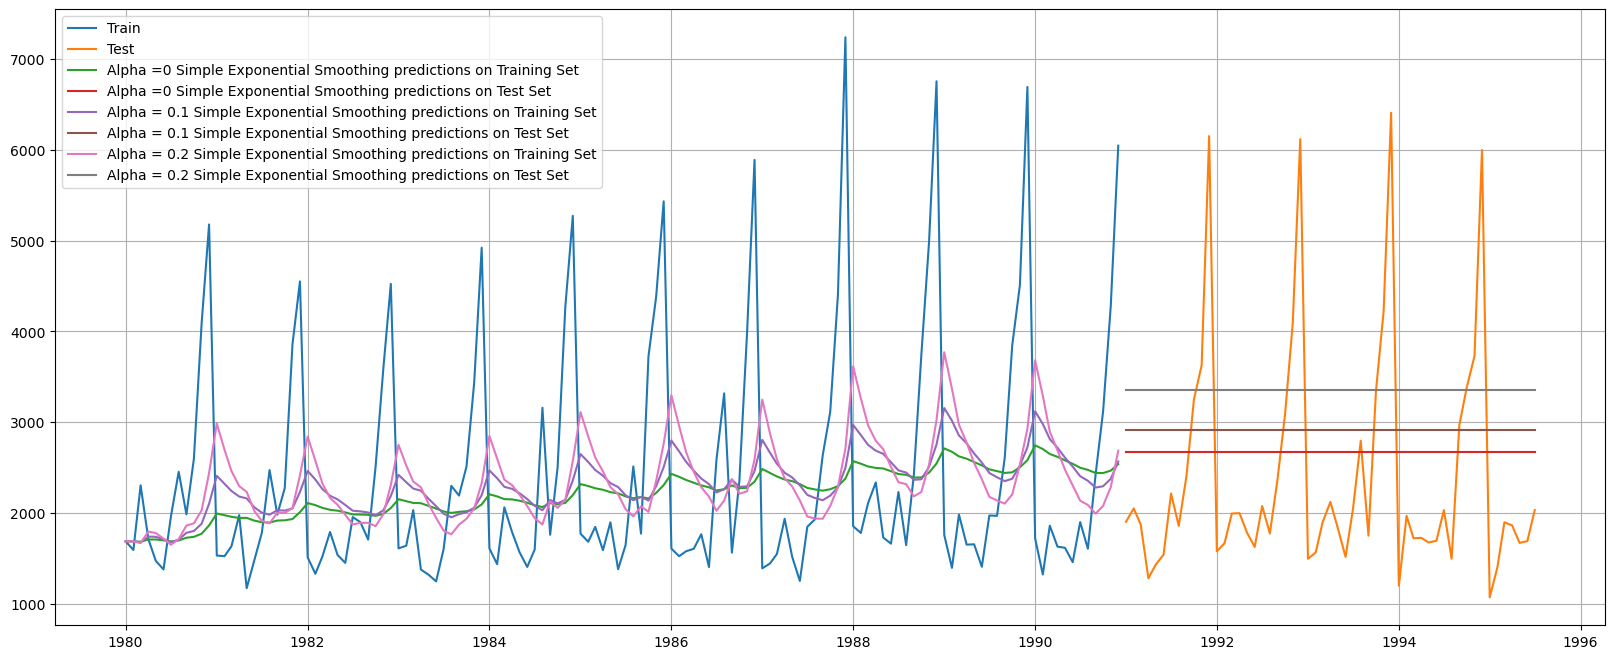

In [91]:
## Plotting on both the Training and Test data

plt.figure(figsize=(20,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_train['predicted'], label='Alpha =0 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predicted'], label='Alpha =0 Simple Exponential Smoothing predictions on Test Set')


plt.plot(SES_train['predict_0.1'], label='Alpha = 0.1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict_0.1'], label='Alpha = 0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_train['predict_0.2'], label='Alpha = 0.2 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict_0.2'], label='Alpha = 0.2 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()

In [92]:
## adding the scores of options with alpha 0.1 and 0.2 to the results table

resultsDf_5_cons = pd.DataFrame({'Test RMSE': [resultsDf_5_2['Test RMSE'][0],resultsDf_5_2['Test RMSE'][1]]
                            ,'Test MAPE': [resultsDf_5_2['Test MAPE'][0],resultsDf_5_2['Test MAPE'][1]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing','Alpha=0.2,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5_cons])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                      1389.135175      50.15
NaiveModel                            3864.279352     152.87
SimpleAverageModel                    1275.073380      38.81
2pointTrailingMovingAverage            813.400684      19.70
4pointTrailingMovingAverage           1156.589694      35.96
6pointTrailingMovingAverage           1283.927428      43.86
9pointTrailingMovingAverage           1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing    1304.927405      44.48
Alpha=0.1,SimpleExponentialSmoothing  1375.393398      49.53
Alpha=0.2,SimpleExponentialSmoothing  1595.206839      60.46

In [93]:
## Method 6: Double Exponential Smoothing (Holt's Model)
DES_train = train.copy()
DES_test = test.copy()

In [94]:
model_DES = Holt(DES_train['Sparkling'],initialization_method='estimated')

In [95]:
## Autofit DES 
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [96]:
model_DES_autofit.params

{'smoothing_level': 0.6649999999999999,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1502.1999999999991,
 'initial_trend': 74.87272727272739,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [97]:
DES_train['predicted'] = model_DES_autofit.fittedvalues
DES_train.head()

Sparkling    predicted
YearMonth                         
1980-01-01       1686  1577.072727
1980-02-01       1591  1724.389335
1980-03-01       2304  1710.556528
1980-04-01       1712  2180.107001
1980-05-01       1471  1943.695281

In [98]:
DES_test['predicted'] = model_DES_autofit.forecast(steps=len(DES_test))
DES_test.head()

Sparkling    predicted
YearMonth                         
1991-01-01       1902  5401.733026
1991-02-01       2049  5476.005230
1991-03-01       1874  5550.277433
1991-04-01       1279  5624.549637
1991-05-01       1432  5698.821840

In [99]:
DES_test.tail()

Sparkling    predicted
YearMonth                         
1995-03-01       1897  9115.343206
1995-04-01       1862  9189.615410
1995-05-01       1670  9263.887613
1995-06-01       1688  9338.159817
1995-07-01       2031  9412.432021

Text(0.5, 1.0, 'Alpha = 0.65, Beta = 0 Predictions')

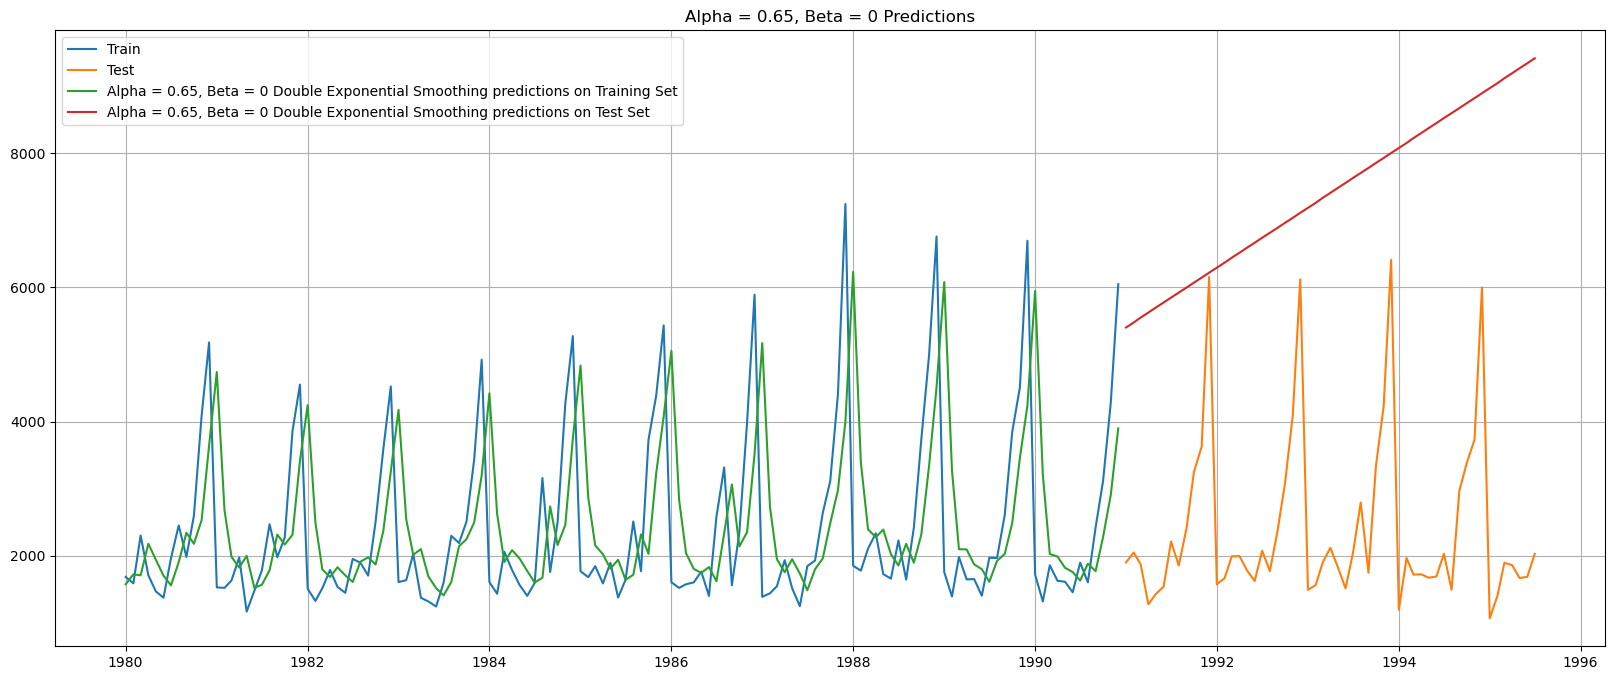

In [100]:
## Plotting on both the Training and Test data

plt.figure(figsize=(20,8))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_train['predicted'], label='Alpha = 0.65, Beta = 0 Double Exponential Smoothing predictions on Training Set')
plt.plot(DES_test['predicted'], label='Alpha = 0.65, Beta = 0 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.65, Beta = 0 Predictions')

In [101]:
## Model Evaluation for alpha = 0.65 beta = 0 : Double Exponential Smoothing
## Training Data
rmse_model6_des_train_1 = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predicted'],squared=False)
mape_model6_des_train_1 = MAPE(DES_train['Sparkling'],DES_train['predicted'])
print("For Alpha = 0.65, Beta = 0 Double Exponential Smoothing Model forecast on the Training Data, RMSE is %3.3f and MAPE is %3.2f" %(rmse_model6_des_train_1, mape_model6_des_train_1))

For Alpha = 0.65, Beta = 0 Double Exponential Smoothing Model forecast on the Training Data, RMSE is 1339.501 and MAPE is 38.82


In [102]:
## Test Data

rmse_model6_des_test_1 = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predicted'],squared=False)
mape_model6_des_test_1 = MAPE(DES_test['Sparkling'],DES_test['predicted'])
print("For Alpha = 0.65, Beta = 0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f and MAPE is %3.2f" %(rmse_model6_des_test_1, mape_model6_des_test_1))

For Alpha = 0.65, Beta = 0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 5291.880 and MAPE is 208.74


In [103]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model6_des_test_1],'Test MAPE': [mape_model6_des_test_1]}
                           ,index=['Alpha=0.65,Beta=0,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                              1389.135175      50.15
NaiveModel                                    3864.279352     152.87
SimpleAverageModel                            1275.073380      38.81
2pointTrailingMovingAverage                    813.400684      19.70
4pointTrailingMovingAverage                   1156.589694      35.96
6pointTrailingMovingAverage                   1283.927428      43.86
9pointTrailingMovingAverage                   1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing            1304.927405      44.48
Alpha=0.1,SimpleExponentialSmoothing          1375.393398      49.53
Alpha=0.2,SimpleExponentialSmoothing          1595.206839      60.46
Alpha=0.65,Beta=0,DoubleExponentialSmoothing  5291.879833     208.74

In [104]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_6_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [105]:
# Assuming resultsDf_6_2, DES_train, and DES_test are predefined DataFrames
for i in np.arange(0.1, 1.1, 0.1):
    for j in np.arange(0.1, 1.1, 0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_slope=j, optimized=True, use_brute=True)
        
        # Store predictions using formatted string keys
        DES_train[f'predict_{i}_{j}'] = model_DES_alpha_i_j.fittedvalues
        DES_test[f'predict_{i}_{j}'] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        # Calculate metrics
        rmse_model6_2_train = metrics.mean_squared_error(DES_train['Sparkling'], DES_train[f'predict_{i}_{j}'], squared=False)
        mape_model6_2_train = MAPE(DES_train['Sparkling'], DES_train[f'predict_{i}_{j}'])
        
        rmse_model6_2_test = metrics.mean_squared_error(DES_test['Sparkling'], DES_test[f'predict_{i}_{j}'], squared=False)
        mape_model6_2_test = MAPE(DES_test['Sparkling'], DES_test[f'predict_{i}_{j}'])
        
        # Create a new row as a dictionary
        new_row = {
            'Alpha Values': i,
            'Beta Values': j,
            'Train RMSE': rmse_model6_2_train,
            'Train MAPE': mape_model6_2_train,
            'Test RMSE': rmse_model6_2_test,
            'Test MAPE': mape_model6_2_test
        }
        
        # Append the new row to the DataFrame using pd.concat
        resultsDf_6_2 = pd.concat([resultsDf_6_2, pd.DataFrame([new_row])], ignore_index=True)

In [106]:
resultsDf_6_2

Alpha Values  Beta Values   Train RMSE  Train MAPE     Test RMSE  \
0            0.1          0.1  1363.474022       44.26   1779.424896   
1            0.1          0.2  1398.190929       45.61   2601.542171   
2            0.1          0.3  1431.370787       46.90   4288.433261   
3            0.1          0.4  1466.773832       48.27   6042.380717   
4            0.1          0.5  1506.866216       49.85   7388.077474   
..           ...          ...          ...         ...           ...   
95           1.0          0.6  1753.362278       45.74  49327.087977   
96           1.0          0.7  1825.157067       47.96  52655.765663   
97           1.0          0.8  1901.992958       50.09  55442.273880   
98           1.0          0.9  1985.350647       51.99  57823.177011   
99           1.0          1.0  2077.639249       53.75  59877.076519   

    Test MAPE  
0       67.23  
1       95.50  
2      155.25  
3      219.09  
4      267.84  
..        ...  
95    1824.42  
96    1945.23  
97    2046.36  
98    2132.75  
99    2207.28  

[100 rows x 6 columns]

Let us sort the data frame in the ascending ordering of the 'Test RMSE' and the 'Test MAPE' values.

In [107]:
resultsDf_6_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values   Train RMSE  Train MAPE    Test RMSE  Test MAPE
0            0.1          0.1  1363.474022       44.26  1779.424896      67.23
1            0.1          0.2  1398.190929       45.61  2601.542171      95.50
10           0.2          0.1  1412.033052       46.62  3611.765464     135.41
2            0.1          0.3  1431.370787       46.90  4288.433261     155.25
20           0.3          0.1  1428.274417       46.92  5908.185554     223.50

In [108]:
resultsDf_6_2.sort_values(by=['Test MAPE']).head()

Alpha Values  Beta Values   Train RMSE  Train MAPE    Test RMSE  Test MAPE
0            0.1          0.1  1363.474022       44.26  1779.424896      67.23
1            0.1          0.2  1398.190929       45.61  2601.542171      95.50
10           0.2          0.1  1412.033052       46.62  3611.765464     135.41
2            0.1          0.3  1431.370787       46.90  4288.433261     155.25
3            0.1          0.4  1466.773832       48.27  6042.380717     219.09

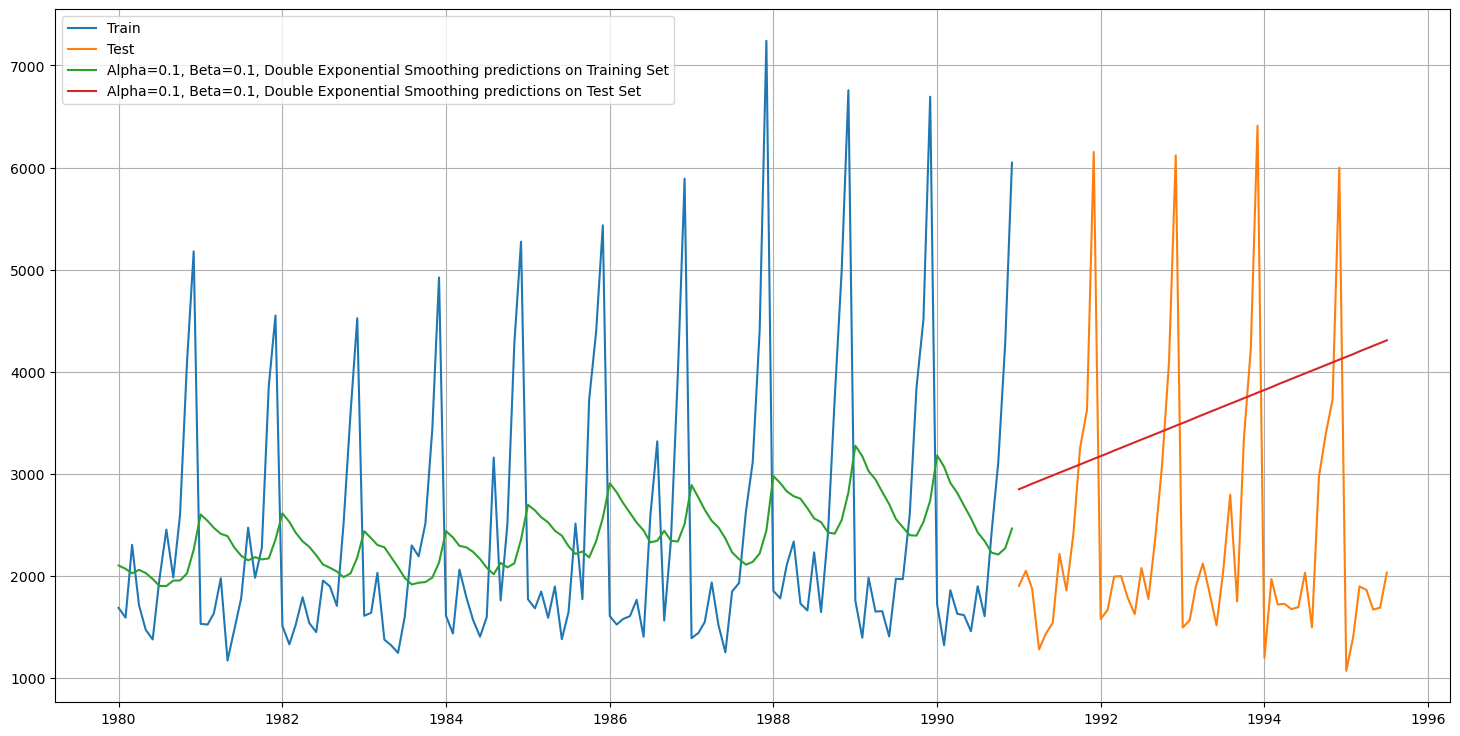

In [109]:
# Create unique string keys for each combination
train_key = 'predict_0.1_0.1'
test_key = 'predict_0.1_0.1'

# Plotting on both the Training and Test data
plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_train[train_key], label='Alpha=0.1, Beta=0.1, Double Exponential Smoothing predictions on Training Set')
plt.plot(DES_test[test_key], label='Alpha=0.1, Beta=0.1, Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.show()

In [110]:
resultsDf_6_2['Test RMSE'][0]

1779.4248957440261

In [111]:
resultsDf_6_cons = pd.DataFrame({'Test RMSE': [resultsDf_6_2['Test RMSE'][0]],'Test MAPE':[resultsDf_6_2['Test MAPE'][0]]}
                           ,index=['Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_cons])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                               1389.135175      50.15
NaiveModel                                     3864.279352     152.87
SimpleAverageModel                             1275.073380      38.81
2pointTrailingMovingAverage                     813.400684      19.70
4pointTrailingMovingAverage                    1156.589694      35.96
6pointTrailingMovingAverage                    1283.927428      43.86
9pointTrailingMovingAverage                    1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing             1304.927405      44.48
Alpha=0.1,SimpleExponentialSmoothing           1375.393398      49.53
Alpha=0.2,SimpleExponentialSmoothing           1595.206839      60.46
Alpha=0.65,Beta=0,DoubleExponentialSmoothing   5291.879833     208.74
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing  1779.424896      67.23

In [112]:
## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)
TES_train = train.copy()
TES_test = test.copy()

In [113]:
TES_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1991-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  55 non-null     int64
dtypes: int64(1)
memory usage: 880.0 bytes


In [114]:
## TES - Auto Fit; we've observed multiplicative seasonal during decomposition
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',initialization_method='estimated')

In [115]:
model_TES_autofit = model_TES.fit()

In [116]:
model_TES_autofit.params

{'smoothing_level': 0.11101471561088701,
 'smoothing_trend': 0.0493145907614654,
 'smoothing_seasonal': 0.36244934537370843,
 'damping_trend': nan,
 'initial_level': 2356.496908624238,
 'initial_trend': -9.809526161838415,
 'initial_seasons': array([0.713711  , 0.68278724, 0.90458411, 0.8053878 , 0.65571739,
        0.65388935, 0.88616088, 1.13350811, 0.91894498, 1.21186447,
        1.87099202, 2.37505867]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [117]:
print('%.15f' %7.4792637216423e-29)

0.000000000000000


In [118]:
## Prediction on the training data

TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

Sparkling  auto_predict
YearMonth                          
1980-01-01       1686   1674.856605
1980-02-01       1591   1596.832218
1980-03-01       2304   2105.851515
1980-04-01       1712   1887.606435
1980-05-01       1471   1514.545054

In [119]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test))
TES_test.head()

Sparkling  auto_predict
YearMonth                          
1991-01-01       1902   1587.923122
1991-02-01       2049   1356.650595
1991-03-01       1874   1763.350752
1991-04-01       1279   1656.524633
1991-05-01       1432   1542.386930

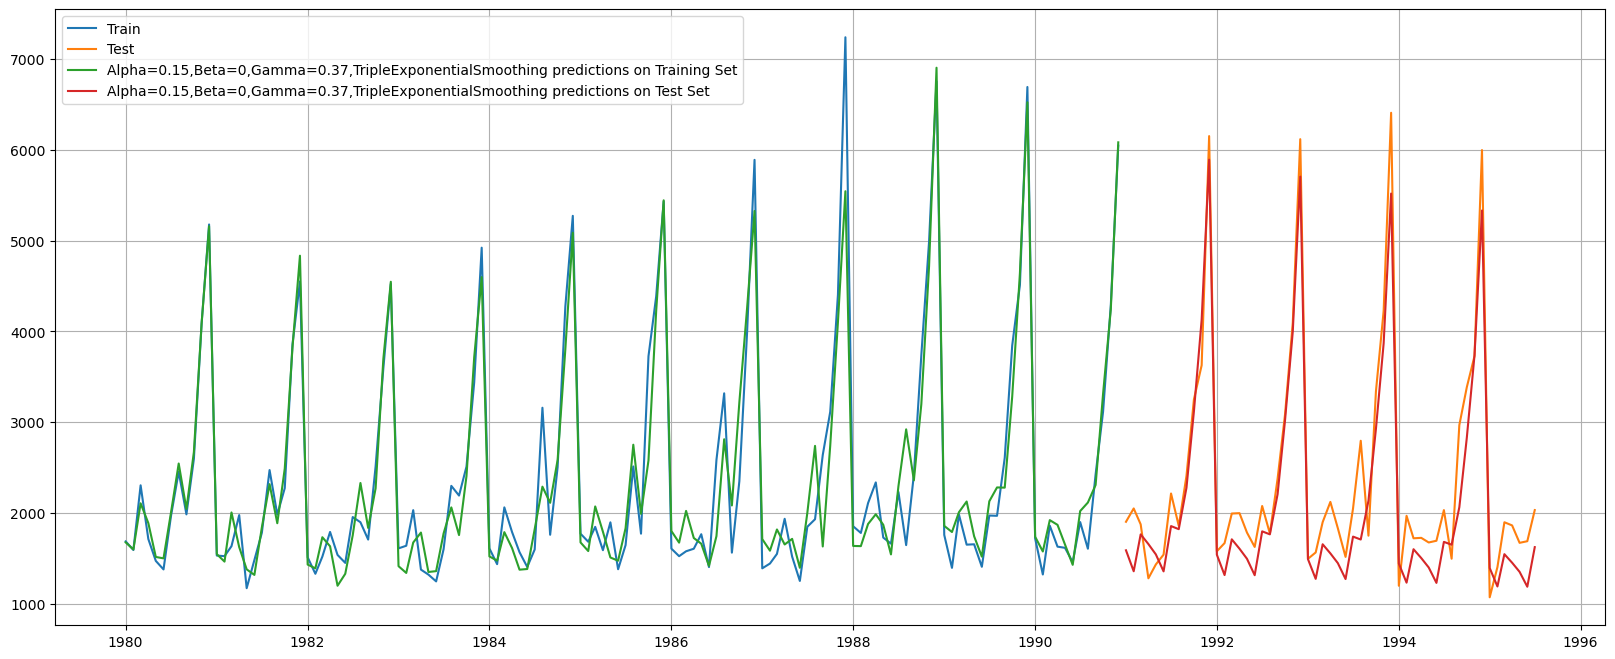

In [120]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(20,8))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_train['auto_predict'], label='Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [121]:
## Training Data

rmse_model7_tes_train_1 = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['auto_predict'],squared=False)
mape_model7_tes_train_1 = MAPE(TES_train['Sparkling'],TES_train['auto_predict'])
print("For Alpha: 0.15, Beta: 0 and Gamma: 0.37, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model7_tes_train_1, mape_model7_tes_train_1))

For Alpha: 0.15, Beta: 0 and Gamma: 0.37, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 355.766 MAPE is 10.19


In [122]:
## Test Data

rmse_model7_tes_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
mape_model7_tes_test_1 = MAPE(TES_test['Sparkling'],TES_test['auto_predict'])
print("For Alpha: 0.15, Beta: 0 and Gamma: 0.37, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model7_tes_test_1, mape_model7_tes_test_1))

For Alpha: 0.15, Beta: 0 and Gamma: 0.37, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 402.936 MAPE is 13.88


In [123]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [rmse_model7_tes_test_1],'Test MAPE':[mape_model7_tes_test_1]}
                           ,index=['Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.073380      38.81
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing                  1304.927405      44.48
Alpha=0.1,SimpleExponentialSmoothing                1375.393398      49.53
Alpha=0.2,SimpleExponentialSmoothing                1595.206839      60.46
Alpha=0.65,Beta=0,DoubleExponentialSmoothing        5291.879833     208.74
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1779.424896      67.23
Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialS...   402.936179      13.88

In [124]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [125]:
# Assuming resultsDf_7_2, TES_train, and TES_test are predefined DataFrames
for i in np.arange(0.1, 1.1, 0.1):
    for j in np.arange(0, 1.1, 0.1):
        for k in np.arange(0.1, 1.1, 0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i, smoothing_slope=j, smoothing_seasonal=k, optimized=True, use_brute=True)
            
            # Store predictions using formatted string keys
            TES_train[f'predict_{i}_{j}_{k}'] = model_TES_alpha_i_j_k.fittedvalues
            TES_test[f'predict_{i}_{j}_{k}'] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            # Calculate metrics
            rmse_model7_2_train = metrics.mean_squared_error(TES_train['Sparkling'], TES_train[f'predict_{i}_{j}_{k}'], squared=False)
            mape_model7_2_train = MAPE(TES_train['Sparkling'], TES_train[f'predict_{i}_{j}_{k}'])
        
            rmse_model7_2_test = metrics.mean_squared_error(TES_test['Sparkling'], TES_test[f'predict_{i}_{j}_{k}'], squared=False)
            mape_model7_2_test = MAPE(TES_test['Sparkling'], TES_test[f'predict_{i}_{j}_{k}'])
        
            # Create a new row as a dictionary
            new_row = {
                'Alpha Values': i,
                'Beta Values': j,
                'Gamma Values': k,
                'Train RMSE': rmse_model7_2_train,
                'Train MAPE': mape_model7_2_train,
                'Test RMSE': rmse_model7_2_test,
                'Test MAPE': mape_model7_2_test
            }
        
            # Append the new row to the DataFrame using pd.concat
            resultsDf_7_2 = pd.concat([resultsDf_7_2, pd.DataFrame([new_row])], ignore_index=True)

In [126]:
resultsDf_7_2

Alpha Values  Beta Values  Gamma Values    Train RMSE  Train MAPE  \
0              0.1          0.0           0.1  3.703878e+02       11.27   
1              0.1          0.0           0.2  3.706990e+02       11.19   
2              0.1          0.0           0.3  3.631165e+02       10.97   
3              0.1          0.0           0.4  3.601778e+02       10.66   
4              0.1          0.0           0.5  3.605657e+02       10.51   
...            ...          ...           ...           ...         ...   
1095           1.0          1.0           0.6  1.882994e+05     1658.66   
1096           1.0          1.0           0.7  2.660015e+05     1554.57   
1097           1.0          1.0           0.8  1.101923e+06     7348.46   
1098           1.0          1.0           0.9  7.695708e+04     1220.71   
1099           1.0          1.0           1.0  2.456050e+04      467.65   

         Test RMSE  Test MAPE  
0     3.641025e+02      10.92  
1     3.160772e+02       9.58  
2     3.332750e+02      10.16  
3     3.180027e+02       9.64  
4     3.271760e+02      10.10  
...            ...        ...  
1095  4.386054e+06   84227.18  
1096  8.649577e+06  188660.61  
1097  2.700435e+05    5645.84  
1098  2.472201e+05    6434.67  
1099  1.256914e+05    2789.45  

[1100 rows x 7 columns]

In [127]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
241           0.3          0.2           0.2  377.417335       11.19   
1             0.1          0.0           0.2  370.698996       11.19   
341           0.4          0.1           0.2  374.765197       11.25   
3             0.1          0.0           0.4  360.177809       10.66   
340           0.4          0.1           0.1  370.612639       11.03   

      Test RMSE  Test MAPE  
241  314.939492      10.01  
1    316.077178       9.58  
341  317.310141      10.54  
3    318.002705       9.64  
340  318.103482      10.01

In [128]:
resultsDf_7_2.sort_values(by=['Test MAPE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Train MAPE  \
1             0.1          0.0           0.2  370.698996       11.19   
3             0.1          0.0           0.4  360.177809       10.66   
551           0.6          0.0           0.2  387.032370       11.51   
440           0.5          0.0           0.1  372.437042       11.05   
452           0.5          0.1           0.3  390.175608       11.54   

      Test RMSE  Test MAPE  
1    316.077178       9.58  
3    318.002705       9.64  
551  318.693435       9.72  
440  324.540242       9.85  
452  325.545267       9.99

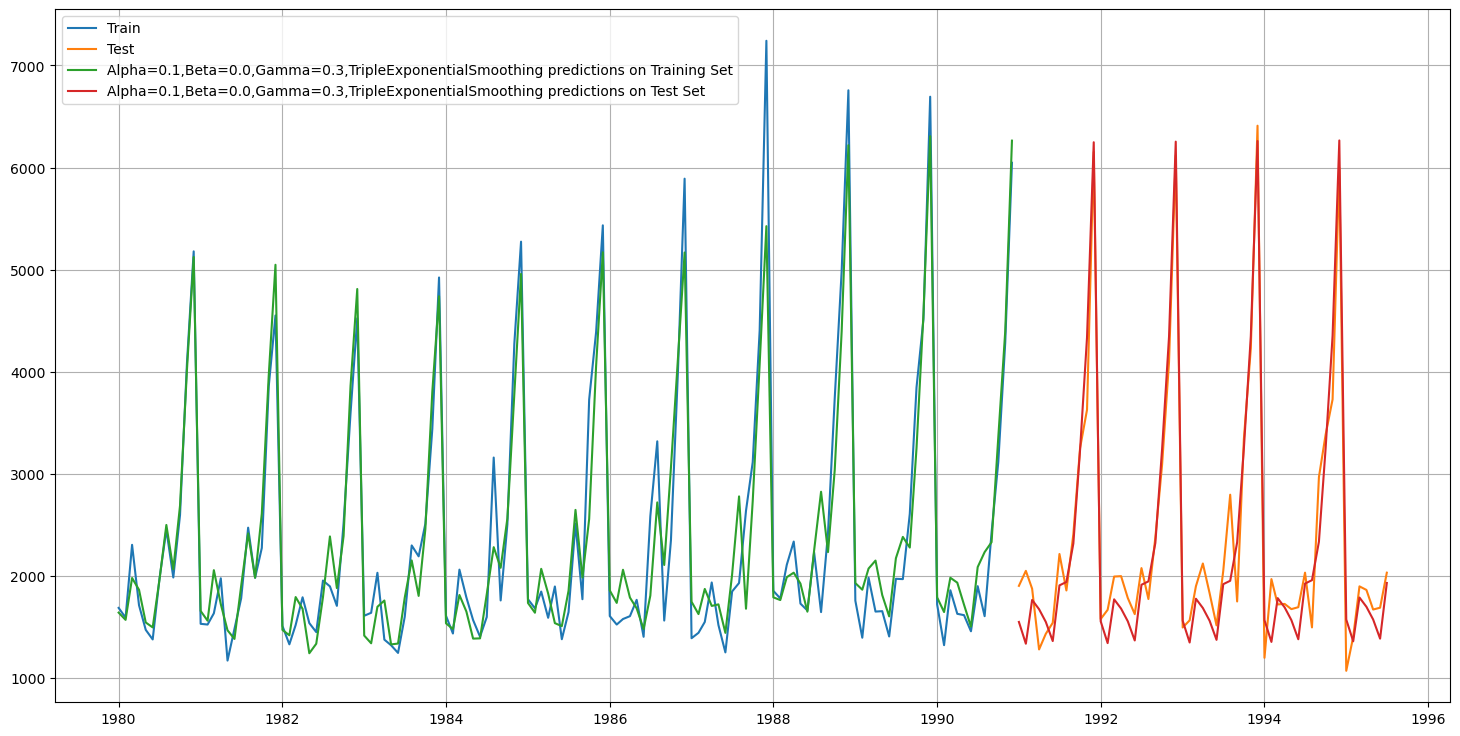

In [129]:
model = ExponentialSmoothing(TES_train['Sparkling'], trend='add', seasonal='add', seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.0, smoothing_seasonal=0.3)

# Generate predictions
TES_train['predict'] = model.fittedvalues
TES_test['predict'] = model.forecast(len(TES_test))

# Plotting
plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_train['predict'], label='Alpha=0.1,Beta=0.0,Gamma=0.3,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict'], label='Alpha=0.1,Beta=0.0,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.show()

In [130]:
resultsDf_7_2['Test RMSE'][2]

333.2750187659232

In [131]:
resultsDf_7_cons = pd.DataFrame({'Test RMSE': [resultsDf_7_2['Test RMSE'][2]],'Test MAPE':[resultsDf_7_2['Test MAPE'][2]]}
                           ,index=['Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_cons])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.073380      38.81
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing                  1304.927405      44.48
Alpha=0.1,SimpleExponentialSmoothing                1375.393398      49.53
Alpha=0.2,SimpleExponentialSmoothing                1595.206839      60.46
Alpha=0.65,Beta=0,DoubleExponentialSmoothing        5291.879833     208.74
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1779.424896      67.23
Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialS...   402.936179      13.88
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   333.275019      10.16

In [132]:
print('Sorted by RMSE values on the Test Data:','\n',resultsDf.sort_values(by=['Test RMSE']))

Sorted by RMSE values on the Test Data: 
                                                       Test RMSE  Test MAPE
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   333.275019      10.16
Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialS...   402.936179      13.88
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
SimpleAverageModel                                  1275.073380      38.81
6pointTrailingMovingAverage                         1283.927428      43.86
Alpha=0,SimpleExponentialSmoothing                  1304.927405      44.48
9pointTrailingMovingAverage                         1346.278315      46.86
Alpha=0.1,SimpleExponentialSmoothing                1375.393398      49.53
RegressionOnTime                                    1389.135175      50.15
Alpha=0.2,SimpleExponentialSmoothing                1595.206839      60.46
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1779.4

We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters 
alpha = 0.1, 
beta = 0 and 
gamma = 0.3.

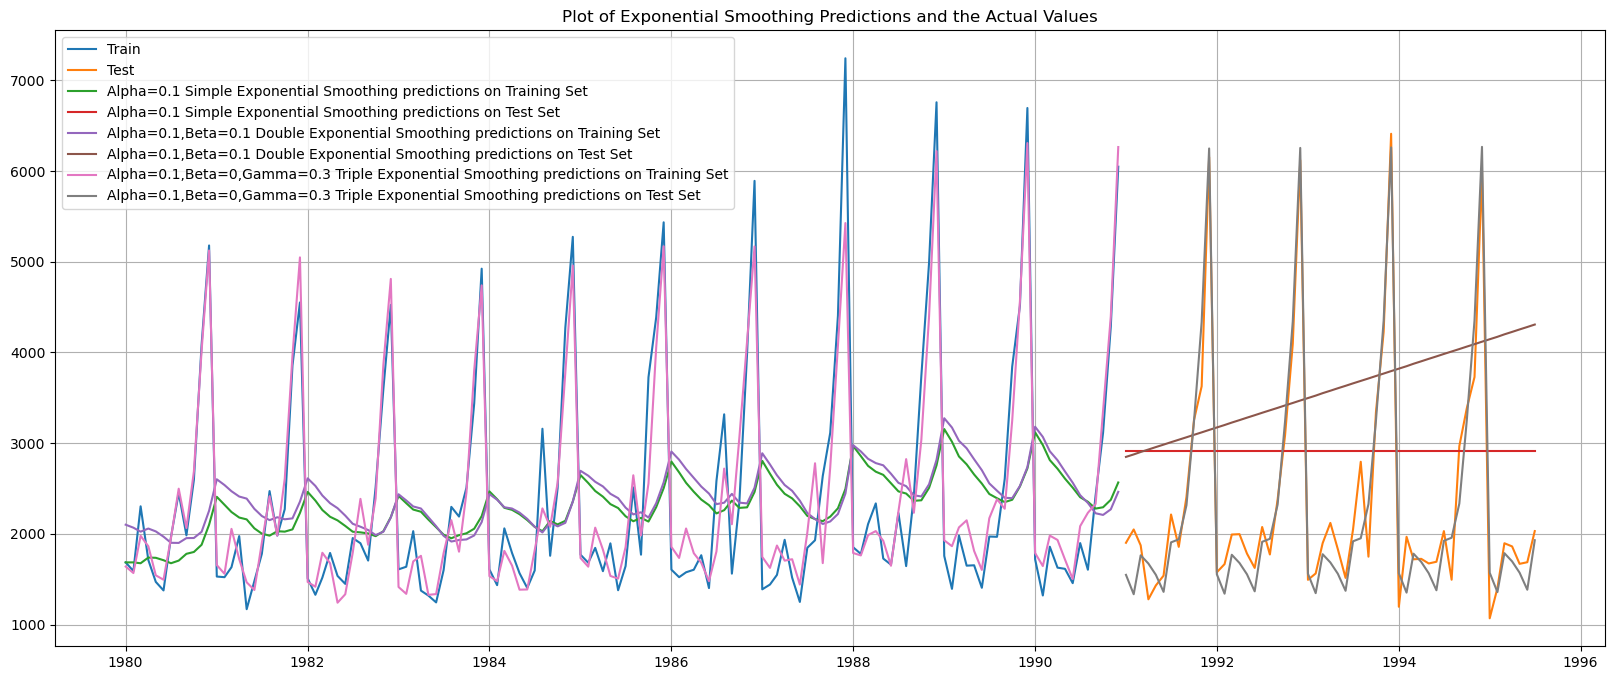

In [133]:
# Assuming train and test are your training and test DataFrames
# Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(train['Sparkling']).fit(smoothing_level=0.1)
train['SES_predict'] = ses_model.fittedvalues
test['SES_predict'] = ses_model.forecast(len(test))

# Double Exponential Smoothing
des_model = ExponentialSmoothing(train['Sparkling'], trend='add').fit(smoothing_level=0.1, smoothing_slope=0.1)
train['DES_predict'] = des_model.fittedvalues
test['DES_predict'] = des_model.forecast(len(test))

# Triple Exponential Smoothing
tes_model = ExponentialSmoothing(train['Sparkling'], trend='add', seasonal='add', seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.0, smoothing_seasonal=0.3)
train['TES_predict'] = tes_model.fittedvalues
test['TES_predict'] = tes_model.forecast(len(test))

# Plotting
plt.figure(figsize=(20,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(train['SES_predict'], label='Alpha=0.1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(test['SES_predict'], label='Alpha=0.1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(train['DES_predict'], label='Alpha=0.1,Beta=0.1 Double Exponential Smoothing predictions on Training Set')
plt.plot(test['DES_predict'], label='Alpha=0.1,Beta=0.1 Double Exponential Smoothing predictions on Test Set')

plt.plot(train['TES_predict'], label='Alpha=0.1,Beta=0,Gamma=0.3 Triple Exponential Smoothing predictions on Training Set')
plt.plot(test['TES_predict'], label='Alpha=0.1,Beta=0,Gamma=0.3 Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Plot of Exponential Smoothing Predictions and the Actual Values')
plt.show()

#### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [134]:
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.squeeze(), autolag='AIC')  # Squeeze to convert to 1D
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)

# Now call the function with the correct series
test_stationarity(train['Sparkling'])  # Replace 'Sparkling' with the actual column name

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


The null hypothesis is that the series is Non-Stationary.
With the resultant ADF test p-value at 0.67, we cannot reject the Null Hypothesis (at alpha 0.05). We hence conclude that the series is non-stationary.

In [135]:
# In order to make the series stationary, we take a 1 period Difference of the original series. 
sparkling_train_d1 = train.diff()

In [146]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [147]:
print(sparkling_train_d1.dropna().shape)

(131, 4)


In [152]:
test_stationarity(train['Sparkling'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


The resultant ADF p-value is significantly less than 0.05 (alpha). We can hence reject the null hypothesis for the new series, derived by differencing the original series over 1 period.

We conclude that at Difference 1, the series is stationary.

In [153]:
print('%1.12f' %2.280104e-12)

0.000000000002


#### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [148]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 3
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [141]:
# Creating an empty Dataframe to compare ARIMA/SARIMA AIC scores
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [149]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [166]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1991-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  55 non-null     int64
dtypes: int64(1)
memory usage: 880.0 bytes


In [151]:
# Assuming pdq is defined and ARIMA_AIC is an empty DataFrame initialized beforehand
AIC_results = []  # Create a list to store results

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values, order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param, ARIMA_model.aic))
    # Append the result as a dictionary to the list
    AIC_results.append({'param': param, 'AIC': ARIMA_model.aic})

# Convert the list of results to a DataFrame
ARIMA_AIC = pd.DataFrame(AIC_results)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155918555
ARIMA(0, 1, 2) - AIC:2234.408323125632
ARIMA(0, 1, 3) - AIC:2233.9948577352334
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.7550946734245
ARIMA(1, 1, 2) - AIC:2234.527200452312
ARIMA(1, 1, 3) - AIC:2235.607810648542
ARIMA(2, 1, 0) - AIC:2260.365743968097
ARIMA(2, 1, 1) - AIC:2233.777626299803
ARIMA(2, 1, 2) - AIC:2213.509212423273
ARIMA(2, 1, 3) - AIC:2232.850547538844
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.4991808486548
ARIMA(3, 1, 2) - AIC:2230.8759326916834
ARIMA(3, 1, 3) - AIC:2221.455985112988


In [154]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
10  (2, 1, 2)  2213.509212
15  (3, 1, 3)  2221.455985
14  (3, 1, 2)  2230.875933
11  (2, 1, 3)  2232.850548
9   (2, 1, 1)  2233.777626
3   (0, 1, 3)  2233.994858
2   (0, 1, 2)  2234.408323
6   (1, 1, 2)  2234.527200
13  (3, 1, 1)  2235.499181
7   (1, 1, 3)  2235.607811
5   (1, 1, 1)  2235.755095
12  (3, 1, 0)  2257.723379
8   (2, 1, 0)  2260.365744
1   (0, 1, 1)  2263.060016
4   (1, 1, 0)  2266.608539
0   (0, 1, 0)  2267.663036

In [172]:
arima_mod = ARIMA(train['Sparkling'], order=(2,1,2),freq='MS')

results_Arima = arima_mod.fit()

print(results_Arima.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sat, 10 Aug 2024   AIC                           2213.509
Time:                        14:22:22   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.216      0.0

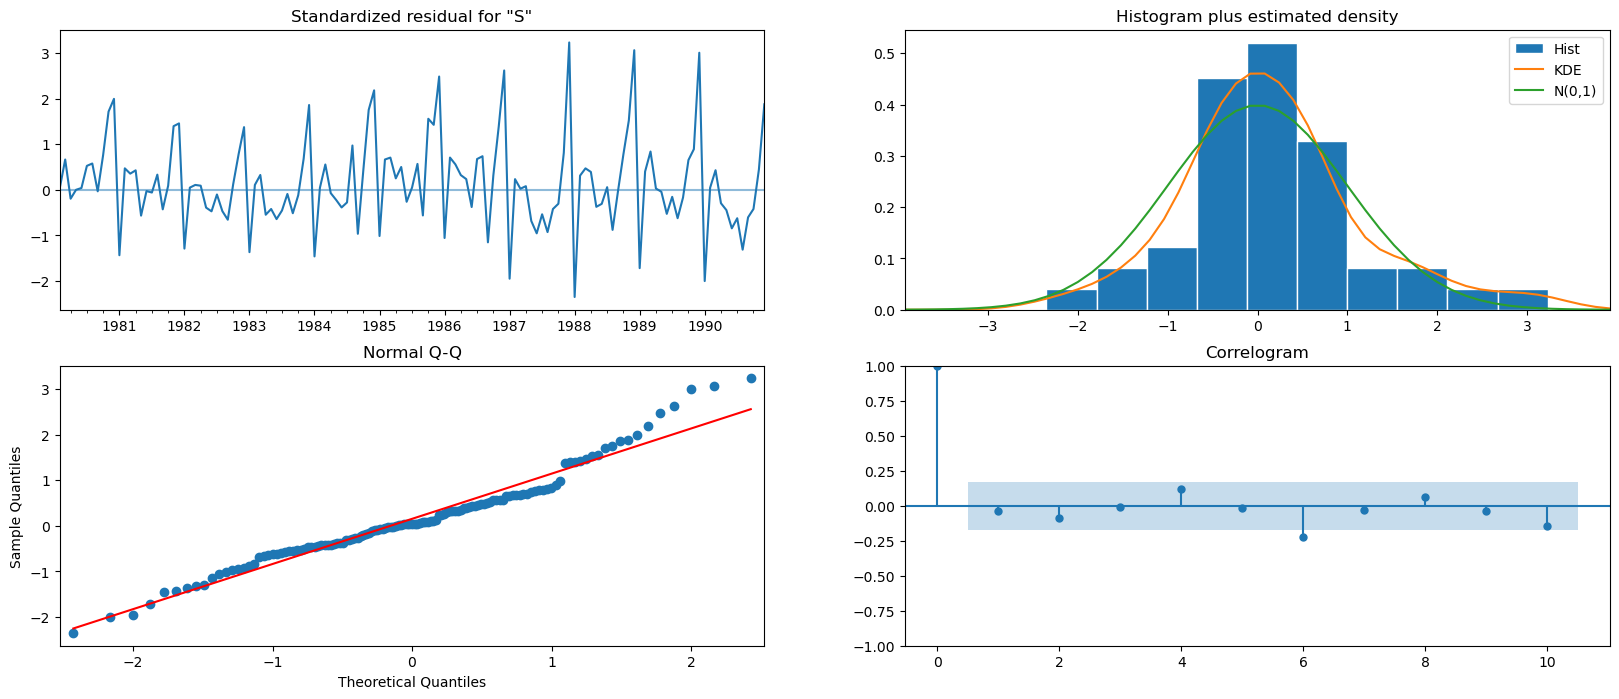

In [174]:
results_Arima.plot_diagnostics();

In [185]:
# Assuming you fit your ARIMA model like this:
# ARIMA_model = ARIMA(train['Sparkling'], order=(p, d, q)).fit()

# To get predictions for the test set
arima_predicted = ARIMA_model.forecast(steps=len(test))  # Get predictions for the test set length

In [186]:
arima_predicted

array([3537.83897237, 2565.02272259, 3131.69897116, 3140.39751357,
       2112.45001752, 1886.65011564, 2795.52469045, 2953.52527106,
       2023.74614122, 1864.54653668, 2781.33621996, 2925.30635596,
       2013.42653962, 1880.49441846, 2785.41565694, 2906.52299226,
       2008.16074703, 1898.46420278, 2790.07949017, 2888.48845463,
       2003.66287187, 1916.34905215, 2794.31048076, 2870.70388398,
       1999.67009709, 1934.01913452, 2798.06241416, 2853.14707278,
       1996.15408929, 1951.46023704, 2801.34557845, 2835.82316592,
       1993.1002578 , 1968.66529945, 2804.17346972, 2818.73849084,
       1990.49490093, 1985.62808482, 2806.55967889, 2801.89904203,
       1988.3244647 , 2002.34280136, 2808.51770268, 2785.31040208,
       1986.57550711, 2018.80407099, 2810.06092547, 2768.97774648,
       1985.23470299, 2035.00691819, 2811.20261133, 2752.90585327,
       1984.28885109, 2050.94675996, 2811.95589703])

In [189]:
import numpy as np
# Ensure arima_predicted is an array-like structure
arima_predicted_array = np.array(arima_predicted)
# Calculate RMSE
rmse_arima_1 = metrics.mean_squared_error(test['Sparkling'], arima_predicted_array, squared=False)
print(rmse_arima_1)

1230.532933828989


In [191]:
mape_arima_1 = MAPE(test['Sparkling'], arima_predicted[0])
print("For ARIMA (2,1,2) Model forecast on the Test Data,  MAPE is %3.2f" %mape_arima_1)

For ARIMA (2,1,2) Model forecast on the Test Data,  MAPE is 65.74


In [192]:
resultsDf_arima_1 = pd.DataFrame({'Test RMSE': [rmse_arima_1], 'Test MAPE': [mape_arima_1]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf_arima_1

Test RMSE  Test MAPE
ARIMA(2,1,2)  1230.532934      65.74

In [193]:
pre_arima_resultsDf = resultsDf.copy()

In [194]:
resultsDf = pd.concat([resultsDf, resultsDf_arima_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.073380      38.81
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing                  1304.927405      44.48
Alpha=0.1,SimpleExponentialSmoothing                1375.393398      49.53
Alpha=0.2,SimpleExponentialSmoothing                1595.206839      60.46
Alpha=0.65,Beta=0,DoubleExponentialSmoothing        5291.879833     208.74
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1779.424896      67.23
Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialS...   402.936179      13.88
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   333.275019      10.16
ARIMA(2,1,2)                                        1230.532934      65.74

In [195]:
## SARIMA model, for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [196]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [199]:
# Assuming pdq and model_pdq are defined and SARIMA_AIC is initialized as an empty DataFrame
results_list = []  # Create a list to store results

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        
        # Append the result as a dictionary to the list
        results_list.append({'param': param, 'seasonal': param_seasonal, 'AIC': results_SARIMA.aic})

# Convert the list of results to a DataFrame
SARIMA_AIC = pd.DataFrame(results_list)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.261461684592
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236667
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1822.982485206384
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1626.8626334678277
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:1452.6773574250167
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.436602245668
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389342
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735792046
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:1646.377816766144
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1628.3243908183629
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:1454.5289621307418
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158607848
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.989805392082
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:1468.5000981866574
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:1455.991155363833
SARIMA(0, 1, 1)x

In [200]:
SARIMA_AIC.sort_values(by=['AIC']).head(10)

param       seasonal          AIC
95   (1, 1, 2)  (0, 1, 2, 12)  1382.347780
41   (0, 1, 2)  (0, 1, 2, 12)  1382.484254
101  (1, 1, 2)  (1, 1, 2, 12)  1384.137874
149  (2, 1, 2)  (0, 1, 2, 12)  1384.317618
47   (0, 1, 2)  (1, 1, 2, 12)  1384.398867
107  (1, 1, 2)  (2, 1, 2, 12)  1385.688721
53   (0, 1, 2)  (2, 1, 2, 12)  1386.023734
155  (2, 1, 2)  (1, 1, 2, 12)  1386.097242
161  (2, 1, 2)  (2, 1, 2, 12)  1387.627785
77   (1, 1, 1)  (0, 1, 2, 12)  1398.756167

Of the options tested, the SARIMA model with the lowest AIC is SARIMA(1,1,2)(0,1,2,12)

In [201]:
# building a SARIMA model with the paramaters above
import statsmodels.api as sm

sarima_mod = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = sarima_mod.fit(maxiter=1000)
print(results_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -685.174
Date:                            Sat, 10 Aug 2024   AIC                           1382.348
Time:                                    14:45:33   BIC                           1397.479
Sample:                                         0   HQIC                          1388.455
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5507      0.287     -1.922      0.055      -1.112       0.011
ma.L1         -0.1612      0.235   

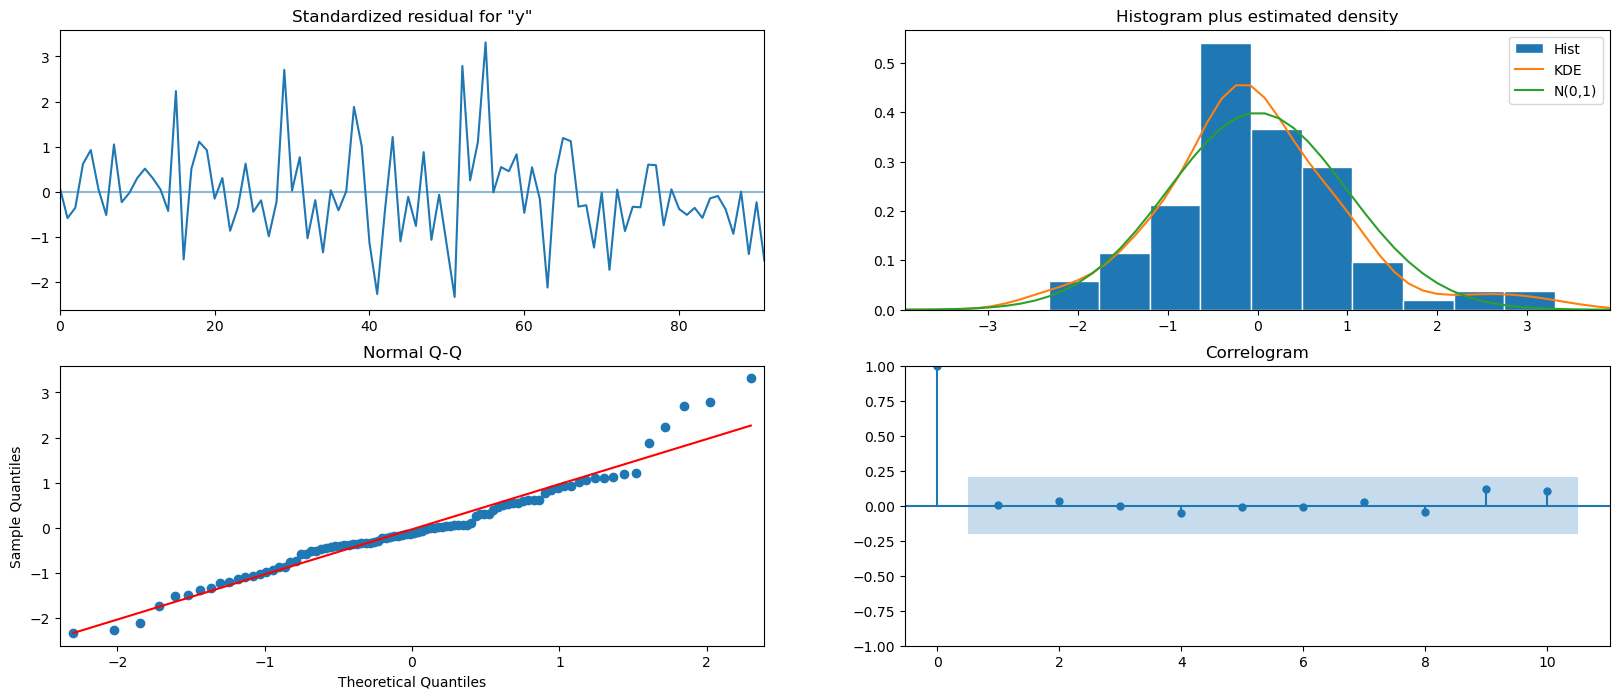

In [202]:
results_SARIMA.plot_diagnostics(figsize=(20, 8))
plt.show()

In [204]:
## Predicting on the Test Set using this model and evaluating the model.
sarima_pred = results_SARIMA.get_forecast(steps=len(test))

In [205]:
sarima_pred.predicted_mean

array([1460.24459048, 1392.43714324, 1743.20166894, 1650.06690054,
       1522.65599853, 1365.34217012, 1854.3991    , 1664.79779175,
       2343.55426567, 3223.02193817, 4306.22501012, 6199.41809206,
       1469.49075077, 1302.52923603, 1707.87032994, 1586.39061187,
       1472.25060151, 1303.70585158, 1801.97604893, 1616.35562068,
       2288.0195793 , 3179.40055504, 4256.1808339 , 6158.41554665,
       1418.87066681, 1244.81712383, 1654.06361005, 1530.43329576,
       1417.47756184, 1248.2806622 , 1746.90998115, 1561.09179414,
       2232.86465327, 3124.18566038, 4200.99896238, 6103.21549016,
       1363.6806243 , 1189.62156689, 1598.87108976, 1475.23910327,
       1362.28429019, 1193.08688347, 1691.71648165, 1505.89814087,
       2177.67108468, 3068.99204516, 4145.80537284, 6048.02188648,
       1308.4870284 , 1134.4279667 , 1543.67749194, 1420.04550414,
       1307.09069178, 1137.89328467, 1636.52288306])

In [206]:
sarima_pred.summary_frame(alpha=0.05)

y          mean     mean_se  mean_ci_lower  mean_ci_upper
0   1460.244590  412.922794     650.930787    2269.558394
1   1392.437143  429.721328     550.198816    2234.675470
2   1743.201669  430.065894     900.288006    2586.115331
3   1650.066901  433.930056     799.579619    2500.554182
4   1522.655999  434.242943     671.555470    2373.756527
5   1365.342170  436.010874     510.776561    2219.907779
6   1854.399100  436.827666     998.232608    2710.565592
7   1664.797792  438.117770     806.102743    2523.492841
8   2343.554266  439.130037    1482.875208    3204.233323
9   3223.021938  440.286511    2360.076234    4085.967643
10  4306.225010  441.358255    3441.178727    5171.271294
11  6199.418092  442.471921    5332.189063    7066.647121
12  1469.490751  521.605057     447.163625    2491.817877
13  1302.529236  531.458113     260.890476    2344.167996
14  1707.870330  531.868437     665.427348    2750.313312
15  1586.390612  535.883646     536.077966    2636.703258
16  1472.250602  537.443957     418.879802    2525.621401
17  1303.705852  540.194609     244.943873    2362.467830
18  1801.976049  542.235286     739.214417    2864.737681
19  1616.355621  544.637690     548.885364    2683.825878
20  2288.019579  546.823254    1216.265695    3359.773463
21  3179.400555  549.112127    2103.160563    4255.640547
22  4256.180834  551.329730    3175.594419    5336.767249
23  6158.415547  553.572232    5073.433909    7243.397184
24  1418.870667  621.912424     199.944714    2637.796620
25  1244.817124  632.834763       4.483779    2485.150468
26  1654.063610  634.089506     411.271015    2896.856205
27  1530.433296  639.418341     277.196376    2783.670216
28  1417.477562  642.131907     158.922151    2676.032973
29  1248.280662  646.140407     -18.131265    2514.692589
30  1746.909981  649.377902     474.152681    3019.667281
31  1561.091794  652.998831     281.237603    2840.945985
32  2232.864653  656.378158     946.387103    3519.342204
33  3124.185660  659.860744    1830.882367    4417.488953
34  4200.998962  663.258741    2901.035718    5500.962207
35  6103.215490  666.675676    4796.555176    7409.875804
36  1363.680624  731.507266     -70.047272    2797.408521
37  1189.621567  743.806932    -268.213231    2647.456364
38  1598.871090  746.027098     136.684847    3061.057333
39  1475.239103  752.701985      -0.029678    2950.507885
40  1362.284290  756.590821    -120.606470    2845.175051
41  1193.086883  761.866289    -300.143604    2686.317371
42  1691.716482  766.309738     189.776994    3193.655969
43  1505.898141  771.155272      -5.538418    3017.334700
44  2177.671085  775.734079     657.260228    3698.081941
45  3068.992045  780.414751    1539.407240    4598.576850
46  4145.805373  784.996830    2607.239859    5684.370887
47  6048.021886  789.590962    4500.452038    7595.591735
48  1308.487028  851.489477    -360.401679    2977.375736
49  1134.427967  865.011057    -560.962551    2829.818485
50  1543.677492  868.269618    -158.099688    3245.454672
51  1420.045504  876.205453    -297.285626    3137.376634
52  1307.090692  881.260213    -420.147586    3034.328970
53  1137.893285  887.749447    -602.063659    2877.850228
54  1636.522883  893.368887    -114.447960    3387.493726

In [208]:
rmse_sarima_1 = metrics.mean_squared_error(test['Sparkling'], sarima_pred.predicted_mean,squared=False)
print(rmse_sarima_1)

382.57675853814857


In [209]:
mape_sarima_1 = MAPE(test['Sparkling'], sarima_pred.predicted_mean)
print("For SARIMA (1,1,2)(0,1,2,12) Model forecast on the Test Data,  MAPE is %3.2f" %mape_sarima_1)

For SARIMA (1,1,2)(0,1,2,12) Model forecast on the Test Data,  MAPE is 12.87


In [210]:
resultsDf_sarima_1 = pd.DataFrame({'Test RMSE': [rmse_sarima_1], 'Test MAPE': [mape_sarima_1]}
                           ,index=['SARIMA(1,1,2)(0,1,2,12)'])

resultsDf_sarima_1

Test RMSE  Test MAPE
SARIMA(1,1,2)(0,1,2,12)  382.576759      12.87

In [211]:
resultsDf = pd.concat([resultsDf, resultsDf_sarima_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.073380      38.81
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing                  1304.927405      44.48
Alpha=0.1,SimpleExponentialSmoothing                1375.393398      49.53
Alpha=0.2,SimpleExponentialSmoothing                1595.206839      60.46
Alpha=0.65,Beta=0,DoubleExponentialSmoothing        5291.879833     208.74
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1779.424896      67.23
Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialS...   402.936179      13.88
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   333.275019      10.16
ARIMA(2,1,2)                                        1230.532934      65.74
SARIMA(1,1,2)(0,1,2,12)                              382.576759      12.87

#### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

In [212]:
## SARIMA with ACF and PACF values
# importing the required libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

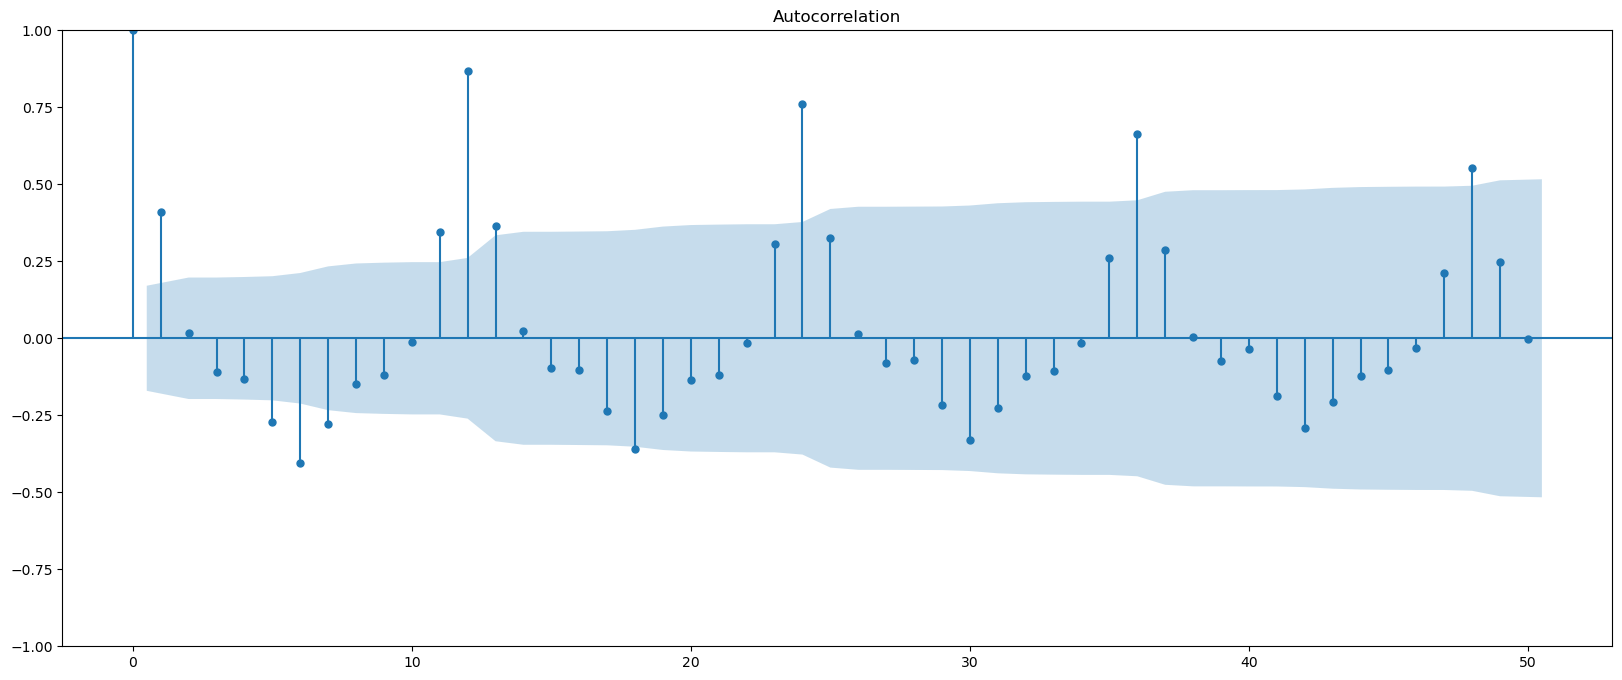

In [214]:
# ACF plot before Differencing
plot_acf(train,lags=50)
plt.show()

We know that the original series is not Stationary. Hence we apply Difference over 1 period, and then plot the ACF on the new series.

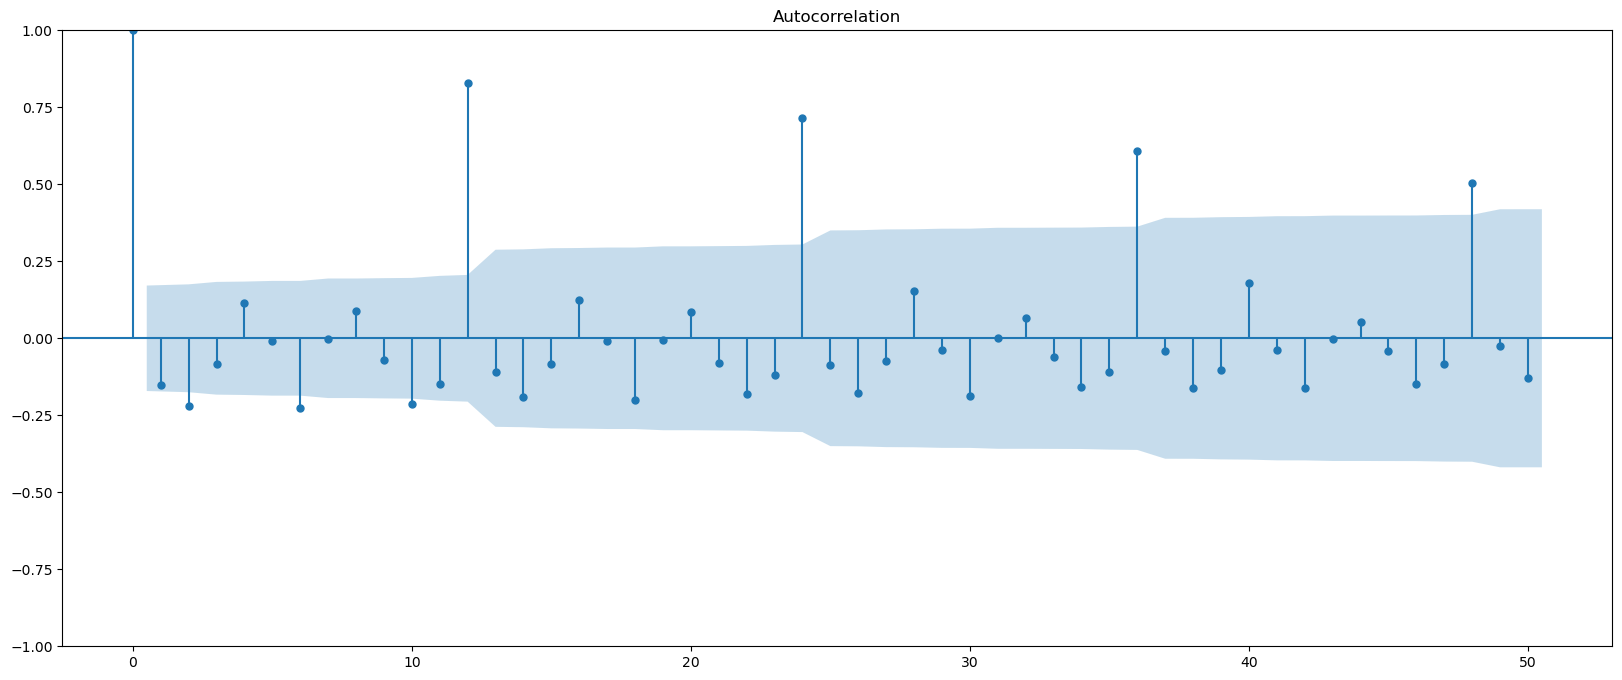

In [216]:
plot_acf(train.diff().dropna(),lags=50)
plt.show()

The cut-off appears right after 0. We see that lag 1 is marginally insignificant. The first significant point is at lag 2.
Hence a possible value of q is 2.

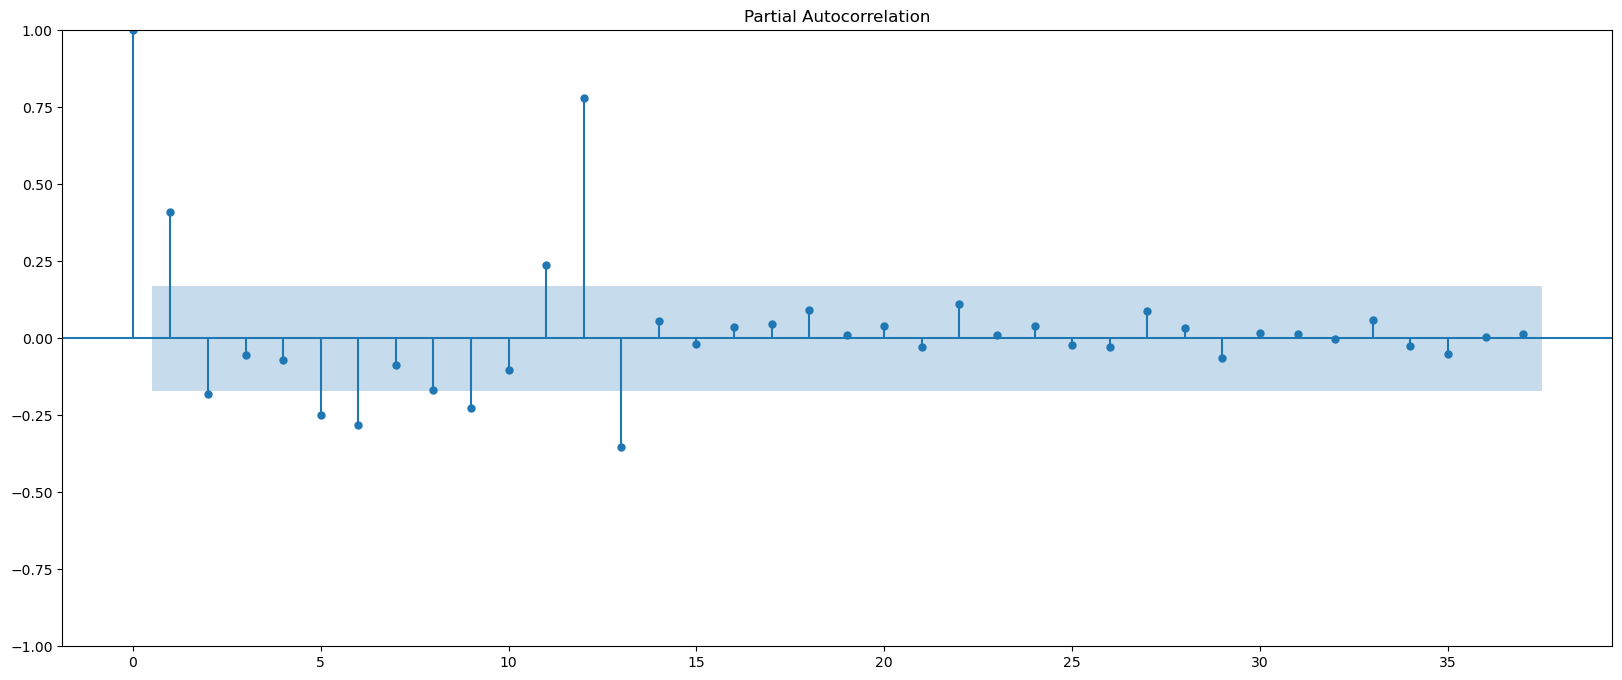

In [218]:
# PACF plot before Differencing
plot_pacf(train,lags=37)
plt.show()

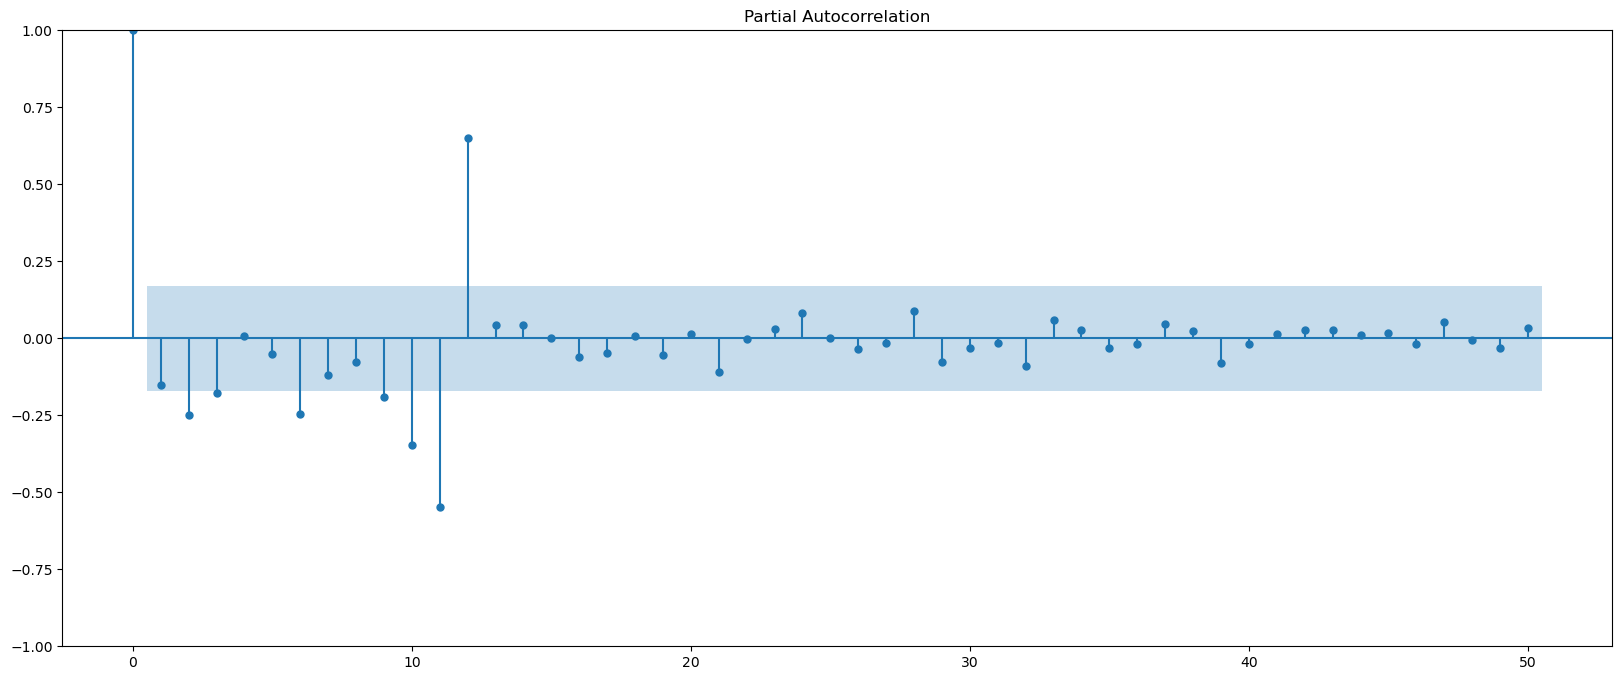

In [219]:
## PACF plot after Differencing the original series over 1 period
plot_pacf(train.diff().dropna(),lags=50)
plt.show()

The cut-off is right after 0. We see that lag 1 is insignificant. The first significant point is at lag 2. 3 can also be considered significant, though it is on the border
Hence a possible value of p is 3.

Based on the ACF and PACF plots, we can assign the following values:
p = 3 (based on the PACF plot)
d = 1 (first order of differencing)
q = 2 (based on the ACF plot)
We can assign 1 to both P and Q - to factor the month to month seasonal effect.

In [220]:
mod_SAP1 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_SAP1 = mod_SAP1.fit(maxiter=1000)
print(results_SARIMA_SAP1.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -771.843
Date:                              Sat, 10 Aug 2024   AIC                           1559.686
Time:                                      14:52:23   BIC                           1580.841
Sample:                                           0   HQIC                          1568.257
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5250      0.293     -1.791      0.073      -1.100       0.049
ar.L2          0.03

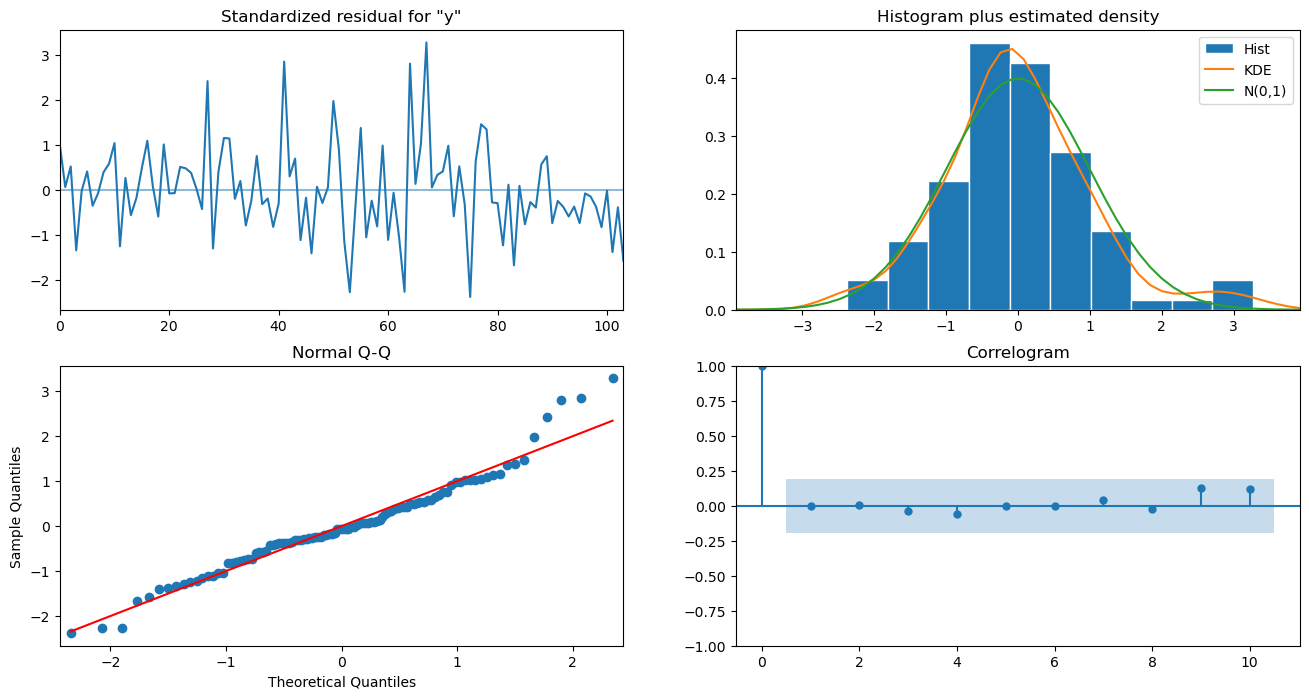

In [221]:
results_SARIMA_SAP1.plot_diagnostics(figsize=(16, 8))
plt.show()

Predict on the Test Set using this model and evaluate the model.

In [223]:
pred_SAP1 = results_SARIMA_SAP1.get_forecast(steps=len(test))
pred_SAP1.predicted_mean

array([1448.39417848, 1359.12194   , 1727.90642153, 1650.75284036,
       1521.96469845, 1353.88995058, 1860.45548182, 1661.49290857,
       2370.62613471, 3298.15632883, 4331.21691872, 6261.28943975,
       1479.87215249, 1267.00613151, 1705.47517855, 1570.75979612,
       1472.08635282, 1299.45602078, 1798.61688063, 1588.09824833,
       2310.5149514 , 3208.55777956, 4258.80192354, 6167.47535278,
       1409.26216923, 1212.08918095, 1641.71499922, 1514.30542172,
       1411.80969561, 1239.75696571, 1739.85854427, 1530.80770585,
       2251.53716299, 3153.32530376, 4201.3868967 , 6112.77828095,
       1351.61789407, 1152.45170207, 1583.20071751, 1454.8632143 ,
       1352.85296443, 1180.72687195, 1680.70896798, 1471.47170212,
       2192.41545974, 3093.72790084, 4142.06670397, 6053.11287529,
       1292.32681862, 1093.41378743, 1524.02014335, 1395.80049785,
       1293.72858666, 1121.61181211, 1621.60908386])

In [224]:
pred_SAP1.summary_frame(alpha=0.05)

y          mean     mean_se  mean_ci_lower  mean_ci_upper
0   1448.394178  403.807014     656.946974    2239.841383
1   1359.121940  418.089222     539.682122    2178.561758
2   1727.906422  418.089214     908.466619    2547.346224
3   1650.752840  425.048379     817.673326    2483.832355
4   1521.964698  425.195130     688.597557    2355.331840
5   1353.889951  427.087584     516.813667    2190.966234
6   1860.455482  428.027423    1021.537149    2699.373815
7   1661.492909  429.129215     820.415103    2502.570714
8   2370.626135  430.262468    1527.327193    3213.925076
9   3298.156329  431.319095    2452.786437    4143.526220
10  4331.216919  432.424973    3483.679546    5178.754291
11  6261.289440  433.500743    5411.643595    7110.935284
12  1479.872152  495.897072     507.931751    2451.812554
13  1267.006132  503.473636     280.215938    2253.796325
14  1705.475179  504.407657     716.854338    2694.096019
15  1570.759796  509.311279     572.528033    2568.991559
16  1472.086353  510.613661     471.301968    2472.870738
17  1299.456021  513.207997     293.586829    2305.325212
18  1798.616881  515.211212     788.821461    2808.412301
19  1588.098248  517.316983     574.175593    2602.020904
20  2310.514951  519.436526    1292.438069    3328.591834
21  3208.557780  521.499301    2186.437932    4230.677627
22  4258.801924  523.587899    3232.588499    5285.015349
23  6167.475353  525.650418    5137.219464    7197.731241
24  1409.262169  596.203895     240.724008    2577.800330
25  1212.089181  606.186916      23.984658    2400.193704
26  1641.714999  607.978043     450.099932    2833.330066
27  1514.305422  614.767072     309.384101    2719.226742
28  1411.809696  617.053596     202.406871    2621.212520
29  1239.756966  621.003118      22.613220    2456.900712
30  1739.858544  624.196545     516.455796    2963.261292
31  1530.807706  627.514448     300.901988    2760.713424
32  2251.537163  630.843245    1015.107123    3487.967203
33  3153.325304  634.093429    1910.525020    4396.125588
34  4201.386897  637.370108    2952.164441    5450.609352
35  6112.778281  640.607505    4857.210643    7368.345918
36  1351.617894  705.697302     -31.523401    2734.759189
37  1152.451702  716.951111    -252.746654    2557.650058
38  1583.200718  719.841440     172.337420    2994.064015
39  1454.863214  727.946926      28.113458    2881.612971
40  1352.852964  731.381271     -80.627985    2786.333914
41  1180.726872  736.587921    -262.958925    2624.412669
42  1680.708968  740.989917     228.395418    3133.022518
43  1471.471702  745.515029      10.289095    2932.654309
44  2192.415460  750.042762     722.358660    3662.472260
45  3093.727901  754.478796    1614.976634    4572.479168
46  4142.066704  758.934338    2654.582736    5629.550672
47  6053.112875  763.340138    4556.993696    7549.232055
48  1292.326819  825.397063    -325.421698    2910.075335
49  1093.413787  837.900318    -548.840658    2735.668233
50  1524.020143  841.904607    -126.082566    3174.122852
51  1395.800498  851.277458    -272.672660    3064.273655
52  1293.728587  855.852751    -383.711981    2971.169154
53  1121.611812  862.274176    -568.414518    2811.638142
54  1621.609084  867.853505     -79.352530    3322.570698

In [225]:
rmse_SAP1 = metrics.mean_squared_error(test['Sparkling'],pred_SAP1.predicted_mean,squared=False)
print(rmse_SAP1)

393.1151103532695


In [226]:
mape_SAP1 = MAPE(test['Sparkling'], pred_SAP1.predicted_mean)
print("For SARIMA (3,1,2)(0,1,1,12) Model forecast on the Test Data,  MAPE is %3.2f" %mape_SAP1)

For SARIMA (3,1,2)(0,1,1,12) Model forecast on the Test Data,  MAPE is 13.27


In [227]:
resultsDf_sarima_2 = pd.DataFrame({'Test RMSE': [rmse_SAP1], 'Test MAPE': [mape_SAP1]}
                           ,index=['SARIMA(3,1,2)(1,1,1,12)'])

resultsDf_sarima_2

Test RMSE  Test MAPE
SARIMA(3,1,2)(1,1,1,12)  393.11511      13.27

In [228]:
resultsDf = pd.concat([resultsDf, resultsDf_sarima_2])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.073380      38.81
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing                  1304.927405      44.48
Alpha=0.1,SimpleExponentialSmoothing                1375.393398      49.53
Alpha=0.2,SimpleExponentialSmoothing                1595.206839      60.46
Alpha=0.65,Beta=0,DoubleExponentialSmoothing        5291.879833     208.74
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1779.424896      67.23
Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialS...   402.936179      13.88
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   333.275019      10.16
ARIMA(2,1,2)                                        1230.532934      65.74
SARIMA(1,1,2)(0,1,2,12)                              382.576759      12.87
SARIMA(3,1,2)(1,1,1,12)                              393.115110      13.27

#### 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [229]:
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                    1389.135175      50.15
NaiveModel                                          3864.279352     152.87
SimpleAverageModel                                  1275.073380      38.81
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
6pointTrailingMovingAverage                         1283.927428      43.86
9pointTrailingMovingAverage                         1346.278315      46.86
Alpha=0,SimpleExponentialSmoothing                  1304.927405      44.48
Alpha=0.1,SimpleExponentialSmoothing                1375.393398      49.53
Alpha=0.2,SimpleExponentialSmoothing                1595.206839      60.46
Alpha=0.65,Beta=0,DoubleExponentialSmoothing        5291.879833     208.74
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1779.424896      67.23
Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialS...   402.936179      13.88
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   333.275019      10.16
ARIMA(2,1,2)                                        1230.532934      65.74
SARIMA(1,1,2)(0,1,2,12)                              382.576759      12.87
SARIMA(3,1,2)(1,1,1,12)                              393.115110      13.27

In [230]:
## let's sort the models by the Test RMSE scores, from the lowest to the highest
resultsDf.sort_values(by='Test RMSE')

Test RMSE  Test MAPE
Alpha=0.1,Beta=0,Gamma=0.3,TripleExponentialSmo...   333.275019      10.16
SARIMA(1,1,2)(0,1,2,12)                              382.576759      12.87
SARIMA(3,1,2)(1,1,1,12)                              393.115110      13.27
Alpha=0.15,Beta=0,Gamma=0.37,TripleExponentialS...   402.936179      13.88
2pointTrailingMovingAverage                          813.400684      19.70
4pointTrailingMovingAverage                         1156.589694      35.96
ARIMA(2,1,2)                                        1230.532934      65.74
SimpleAverageModel                                  1275.073380      38.81
6pointTrailingMovingAverage                         1283.927428      43.86
Alpha=0,SimpleExponentialSmoothing                  1304.927405      44.48
9pointTrailingMovingAverage                         1346.278315      46.86
Alpha=0.1,SimpleExponentialSmoothing                1375.393398      49.53
RegressionOnTime                                    1389.135175      50.15
Alpha=0.2,SimpleExponentialSmoothing                1595.206839      60.46
Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing       1779.424896      67.23
NaiveModel                                          3864.279352     152.87
Alpha=0.65,Beta=0,DoubleExponentialSmoothing        5291.879833     208.74

Based on the Test RMSE scores, the model that performs best on the Test data is: Triple Exponential Smoothing Model (alpha=0.1, beta = 0, gamma = 0.3). The model that performs second best is SARIMAX (1,1,2)x(0,1,2,12).

#### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

Building a Triple Exponential Smoothing (alpha = 0.1, beta = 0, gamma = 0.3) model on the complete data, and forecasting for the next 12 months

In [231]:
TES_data = sparkling_data.copy()

In [232]:
TES_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [233]:
model_TES_best = ExponentialSmoothing(TES_data['Sparkling'],trend='additive',seasonal='multiplicative')

In [234]:
TES_best = model_TES_best.fit(smoothing_level=0.1,smoothing_slope=0.0,smoothing_seasonal=0.3,optimized=True,use_brute=True)

In [235]:
print(TES_best.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                Sparkling   No. Observations:                  187
Model:             ExponentialSmoothing   SSE                       23385987.568
Optimized:                         True   AIC                           2226.733
Trend:                         Additive   BIC                           2278.431
Seasonal:                Multiplicative   AICC                          2230.804
Seasonal Periods:                    12   Date:                 Sat, 10 Aug 2024
Box-Cox:                          False   Time:                         14:59:21
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1000000                alpha                False
smoothing_trend          

In [236]:
## Forecast
TES_best_forecast = TES_best.forecast(steps=12)

In [237]:
TES_best_forecast

1995-08-01    1926.181231
1995-09-01    2392.240526
1995-10-01    3214.956517
1995-11-01    3940.486339
1995-12-01    6063.416433
1996-01-01    1354.012597
1996-02-01    1628.346655
1996-03-01    1864.353039
1996-04-01    1828.938999
1996-05-01    1675.336962
1996-06-01    1594.829966
1996-07-01    2004.616019
Freq: MS, dtype: float64

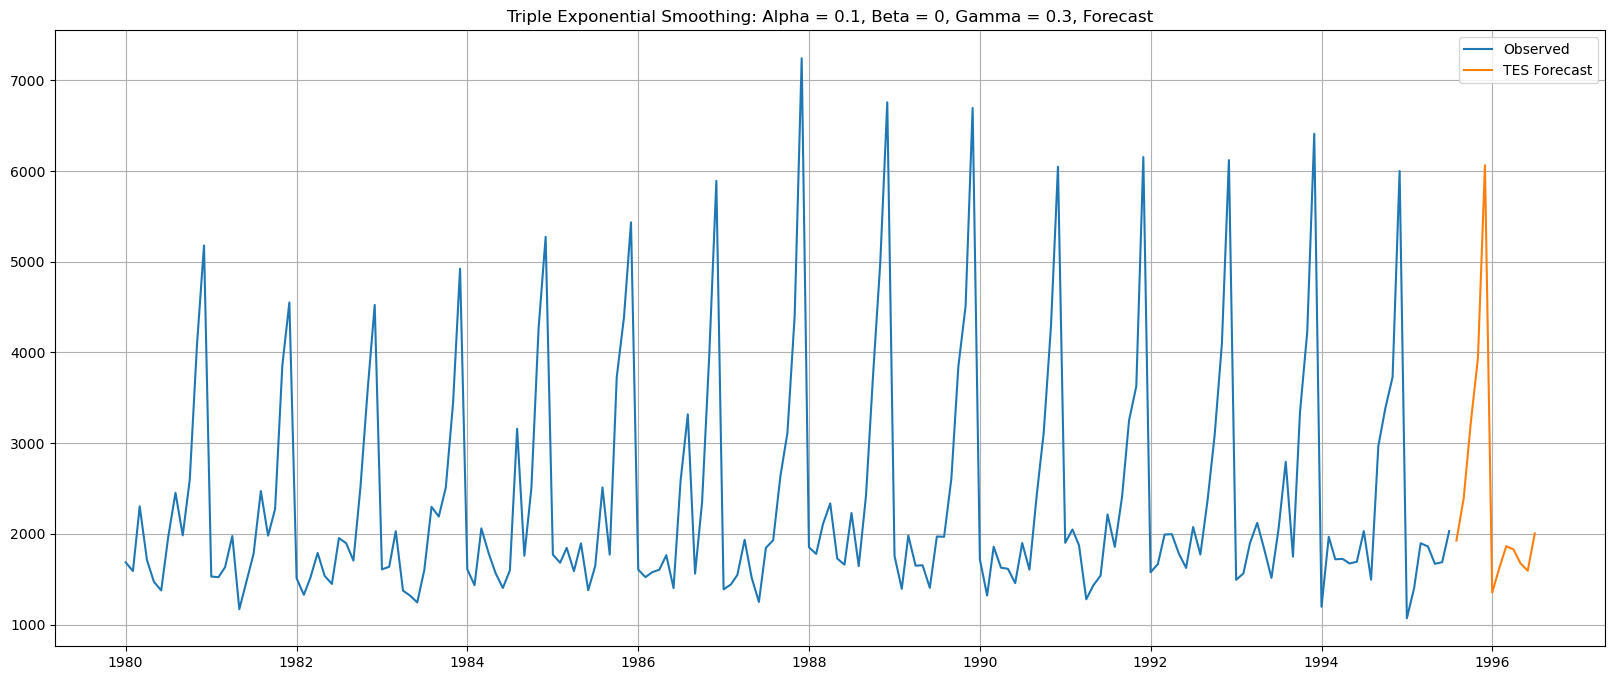

In [239]:
## Plotting on observed data and the forecast

plt.figure(figsize=(20,8))
plt.plot(TES_data['Sparkling'], label='Observed')

plt.plot(TES_best_forecast, label='TES Forecast')

plt.title('Triple Exponential Smoothing: Alpha = 0.1, Beta = 0, Gamma = 0.3, Forecast')
plt.legend(loc='best')
plt.grid();

Building a SARIMAX (1,1,2)x(0,1,2,12) model on the complete data, and forecasting for the next 12 months

In [241]:
full_mod = sm.tsa.statespace.SARIMAX(sparkling_data['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_SARIMA_7 = full_mod.fit(maxiter=1000)
print(results_SARIMA_7.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -1086.537
Date:                            Sat, 10 Aug 2024   AIC                           2185.074
Time:                                    15:01:36   BIC                           2203.017
Sample:                                         0   HQIC                          2192.364
                                            - 187                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5604      0.367     -1.528      0.127      -1.279       0.159
ma.L1         -0.2810      0.339   

In [242]:
pred_full_SARIMA = results_SARIMA_7.get_forecast(steps=12)

In [243]:
pred_full_SARIMA_date = pd.DataFrame(pred_full_SARIMA.summary_frame())
pred_full_SARIMA_date.head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1869.773824  389.242864    1106.871830    2632.675818
1  2484.478957  394.109544    1712.038445    3256.919470
2  3294.053830  394.224773    2521.387473    4066.720186
3  3932.871854  395.395952    3157.910028    4707.833680
4  6131.684131  395.477250    5356.562964    6906.805299

In [244]:
pred_full_SARIMA_date = pred_full_SARIMA_date.set_index(pd.date_range(start='1995-08-01',end='1996-07-01', freq='MS'))

In [245]:
pred_full_SARIMA_date

y                  mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  1869.773824  389.242864    1106.871830    2632.675818
1995-09-01  2484.478957  394.109544    1712.038445    3256.919470
1995-10-01  3294.053830  394.224773    2521.387473    4066.720186
1995-11-01  3932.871854  395.395952    3157.910028    4707.833680
1995-12-01  6131.684131  395.477250    5356.562964    6906.805299
1996-01-01  1245.194599  396.011773     469.025787    2021.363412
1996-02-01  1580.097515  396.243081     803.475347    2356.719684
1996-03-01  1837.508352  396.628377    1060.131018    2614.885687
1996-04-01  1818.653937  396.922123    1040.700871    2596.607002
1996-05-01  1664.133401  397.265205     885.507907    2442.758894
1996-06-01  1615.682106  397.579772     836.440073    2394.924140
1996-07-01  2016.795825  397.909744    1236.907058    2796.684592

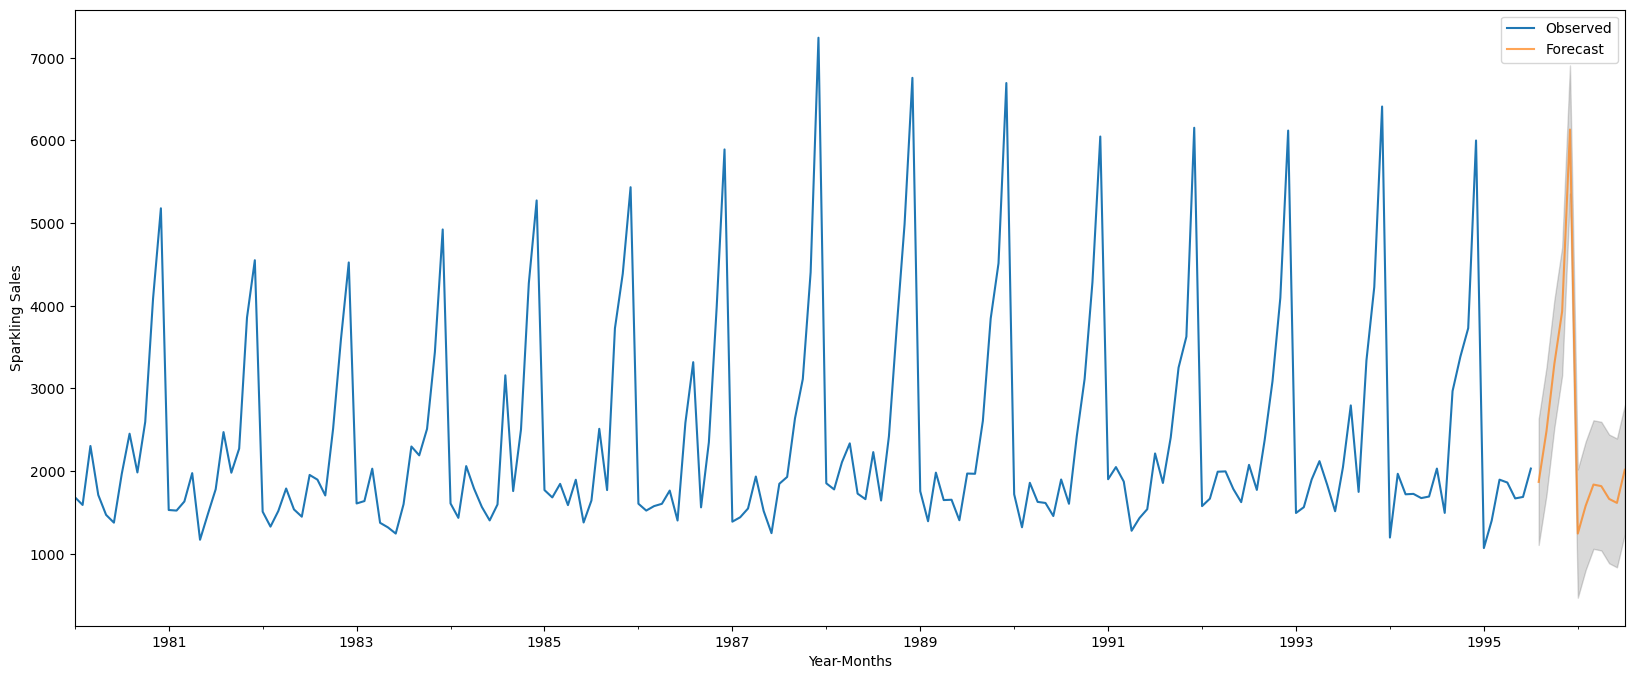

In [246]:
# plot the forecast along with the confidence band
plt.figure(figsize=(20,8))
axis = sparkling_data['Sparkling'].plot(label='Observed')
pred_full_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_SARIMA_date.index, pred_full_SARIMA_date['mean_ci_lower'], 
                  pred_full_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling Sales')
plt.legend(loc='best')
plt.show()

#### 9. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

Model Performance: After evaluating various forecasting models, the top-performing ones are:
Tuned Triple Exponential Model (Alpha = 0.1, Beta = 0, Gamma = 0.3): It shows the best accuracy with a Test RMSE of 333.273 and MAPE of 10.16.
SARIMA with Seasonal Differencing (SARIMA(1, 1, 2)(0, 1, 2, 12)): It also performs well, with a Test RMSE of 382.57 and MAPE of 12.87.
Triple Exponential Smoothing (Alpha = 0.111, Beta = 0.049, Gamma = 0.362): This model is the fourth-best with a Test RMSE of 402.931 and MAPE of 13.88.
On the other hand, the Alpha=0.665, Beta = 0.0001 Double Exponential Smoothing model performs poorly with a high Test RMSE of 5291.88 and MAPE of 268.91.
Predictions on Full Data: For the best 2 model
Tuned Triple Exponential Model with Alpha = 0.1, Beta = 0, and Gamma = 0.3, the RMSE of the Full Model is 333.27.

Automated SARIMA with Seasonal Differencing (SARIMA(1, 1, 2)(0, 1, 2, 12)): It also performs well, with a full model RMSE of 382.59

These two models projects the sales trend for 12 months ahead based on historical patterns.

Both models give a similar forecast, indicating that the constant trend & seasonality observed in the sales of previous few years will continue with a slight increase in sales during the holiday season (November – December) compared to last year.
Measures for Future Sales
Based on the analysis, the company can take the following measures to improve future sales:

Capitalize on Seasonal Trends: With observed seasonal patterns during November and December, the company should plan production and marketing efforts to meet increased demand during holiday seasons.

Inventory Management: Implement effective inventory management to avoid stockouts during peak periods and minimize excess inventory during slower periods.

Pricing Strategy: Utilize dynamic pricing to adjust prices during peak and off-peak periods, attracting more customers and optimizing revenue.

Customer Engagement: Strengthen customer relationships through personalized offers, loyalty programs, and active engagement to foster repeat purchases.